In [2]:
!pip install hopsworks gradio seaborn matplotlib numpy pandas scikit-learn shap xgboost category_encoders hsfs hsml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.4/646.4 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install shap pandas numpy matplotlib seaborn scikit-learn xgboost


In [3]:
!pip install hopsworks[python]

  Using cached hopsworks-4.1.8-py3-none-any.whl.metadata (11 kB)
Using cached hopsworks-4.1.8-py3-none-any.whl (646 kB)


In [49]:

# Standard Libraries
import numpy as np
import pandas as pd
import warnings
from collections import Counter

# Utilities
import joblib
import time
import gc


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy import stats


# Scikit-learn Model Selection
from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    StratifiedKFold
)

# Scikit-learn Preprocessing
from sklearn.preprocessing import (
    StandardScaler,
    RobustScaler,
    OneHotEncoder,
    FunctionTransformer
)

# Scikit-learn Pipeline Tools
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Scikit-learn Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    ConfusionMatrixDisplay,
    log_loss,
    matthews_corrcoef,
    auc,
)

# Scikit-learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Feature Selection
from sklearn.feature_selection import (
    SelectFromModel,
    RFECV,
    SelectKBest,
    f_classif,
    RFE
)

# Ensemble Methods
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

# Model Interpretation
import shap

# MLOps Platform
import hopsworks


# Warnings Configuration
# warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
### Set display options for better notebook readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

In [6]:
# Load the data
column_names = [
    'checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings_account', 'employment_since', 'installment_rate', 'personal_status_sex',
    'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans',
    'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
    'risk'
]

df = pd.read_csv('C:/Users/joyou/Documents/Data Science Projects/Credit Risk Assessmemt/engineered_credit_data.csv', sep=' ', header=None, names=column_names)

# Print dataset information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())


Dataset shape: (1000, 21)

First 5 rows:


,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
# Adjust the target variable (1 = good, 2 = bad) to 0 = bad, 1 = good
df['risk'] = df['risk'].map({1: 1, 2: 0})  # 1 = good credit, 0 = bad credit

# Basic dataset information
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account         1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings_account          1000 non-null   object
 6   employment_since         1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1

In [8]:
# Check for missing values
print("\nCheck for missing values:")
display(df.isnull().sum())

print("\nBasic statistics:")
display(df.describe())


Check for missing values:


,0
checking_account,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_account,0
employment_since,0
installment_rate,0
personal_status_sex,0
other_debtors,0



Basic statistics:


,duration,credit_amount,installment_rate,present_residence,age,number_credits,people_liable,risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000



== Exploratory Data Analysis ==


Text(0, 0.5, 'Count')

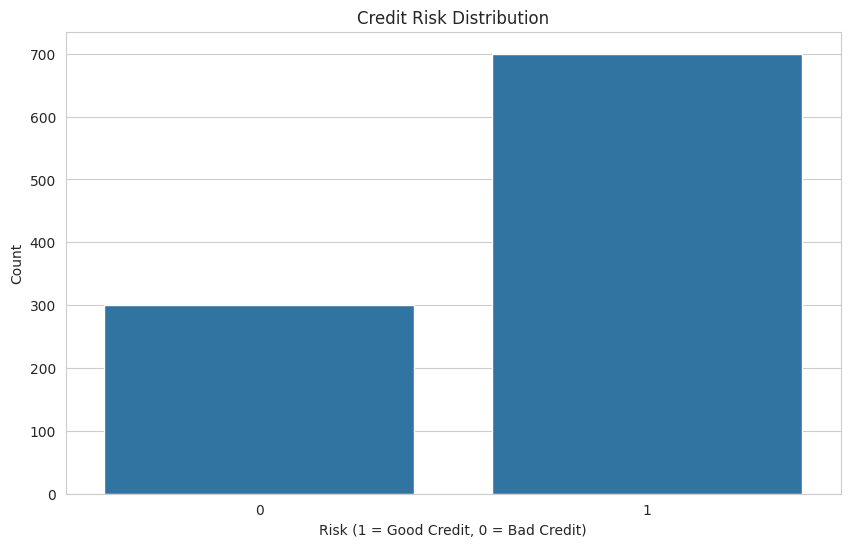

In [9]:
# Exploratory Data Analysis
print("\n== Exploratory Data Analysis ==")

# 1. Target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='risk', data=df)
plt.title('Credit Risk Distribution')
plt.xlabel('Risk (1 = Good Credit, 0 = Bad Credit)')
plt.ylabel('Count')

In [10]:
# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [11]:
# Calculate and display risk ratio
good_risk = df['risk'].sum()
bad_risk = len(df) - good_risk
print(f"Good credit: {good_risk} ({good_risk/len(df)*100:.2f}%)")
print(f"Bad credit: {bad_risk} ({bad_risk/len(df)*100:.2f}%)")

Good credit: 700 (70.00%)
Bad credit: 300 (30.00%)


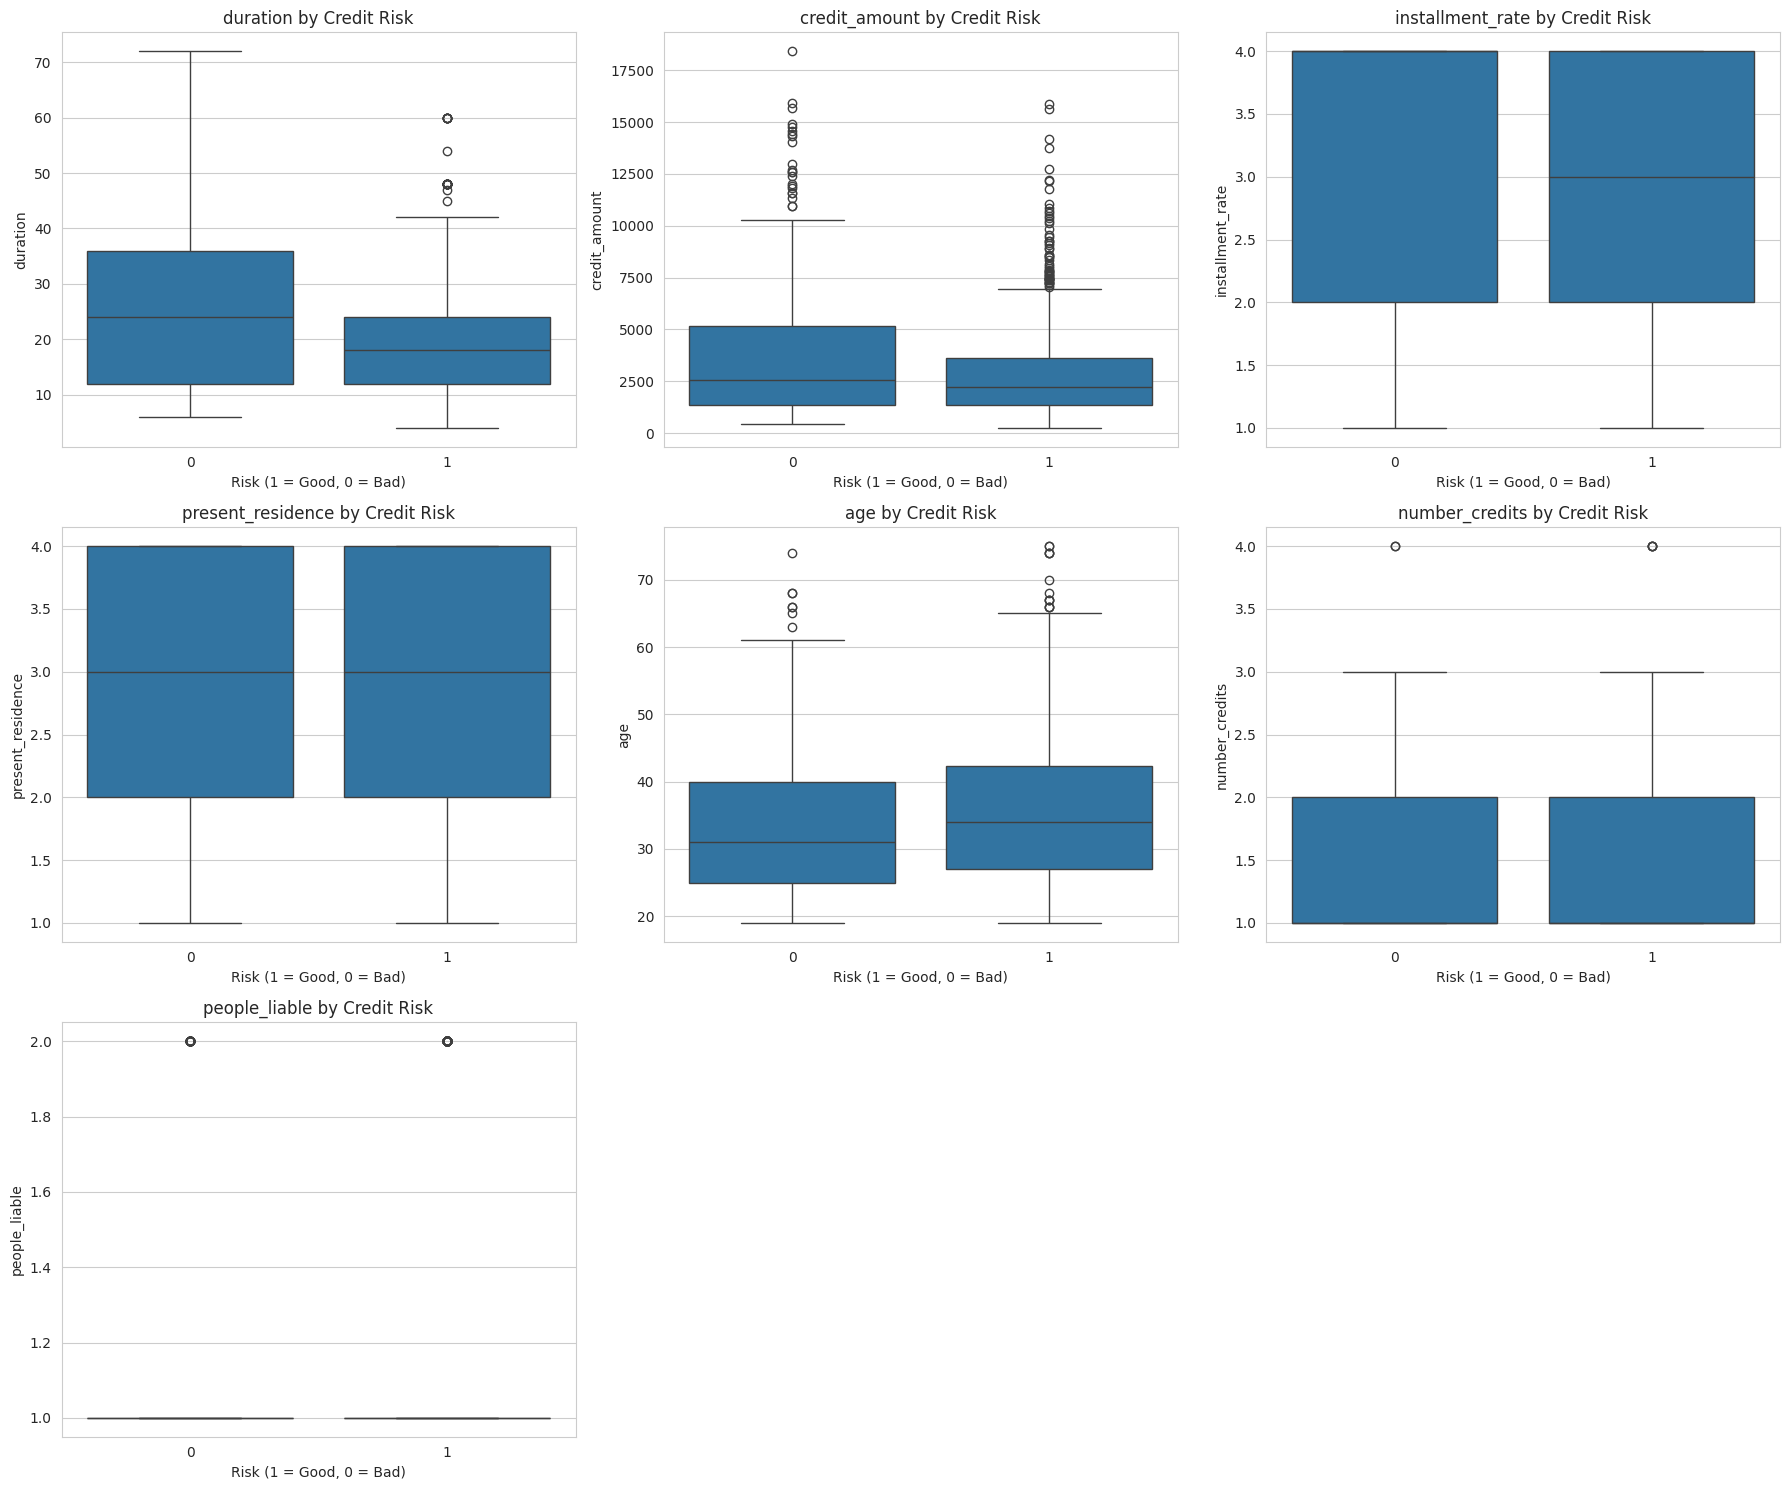

In [12]:
# Numerical variables analysis
num_cols = ['duration', 'credit_amount', 'installment_rate', 'present_residence',
            'age', 'number_credits', 'people_liable']

# Boxplots for numerical variables by risk
plt.figure(figsize=(18, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='risk', y=col, data=df)
    plt.title(f'{col} by Credit Risk')
    plt.xlabel('Risk (1 = Good, 0 = Bad)')
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/numerical_variables_by_credit_risk.png')
plt.show()

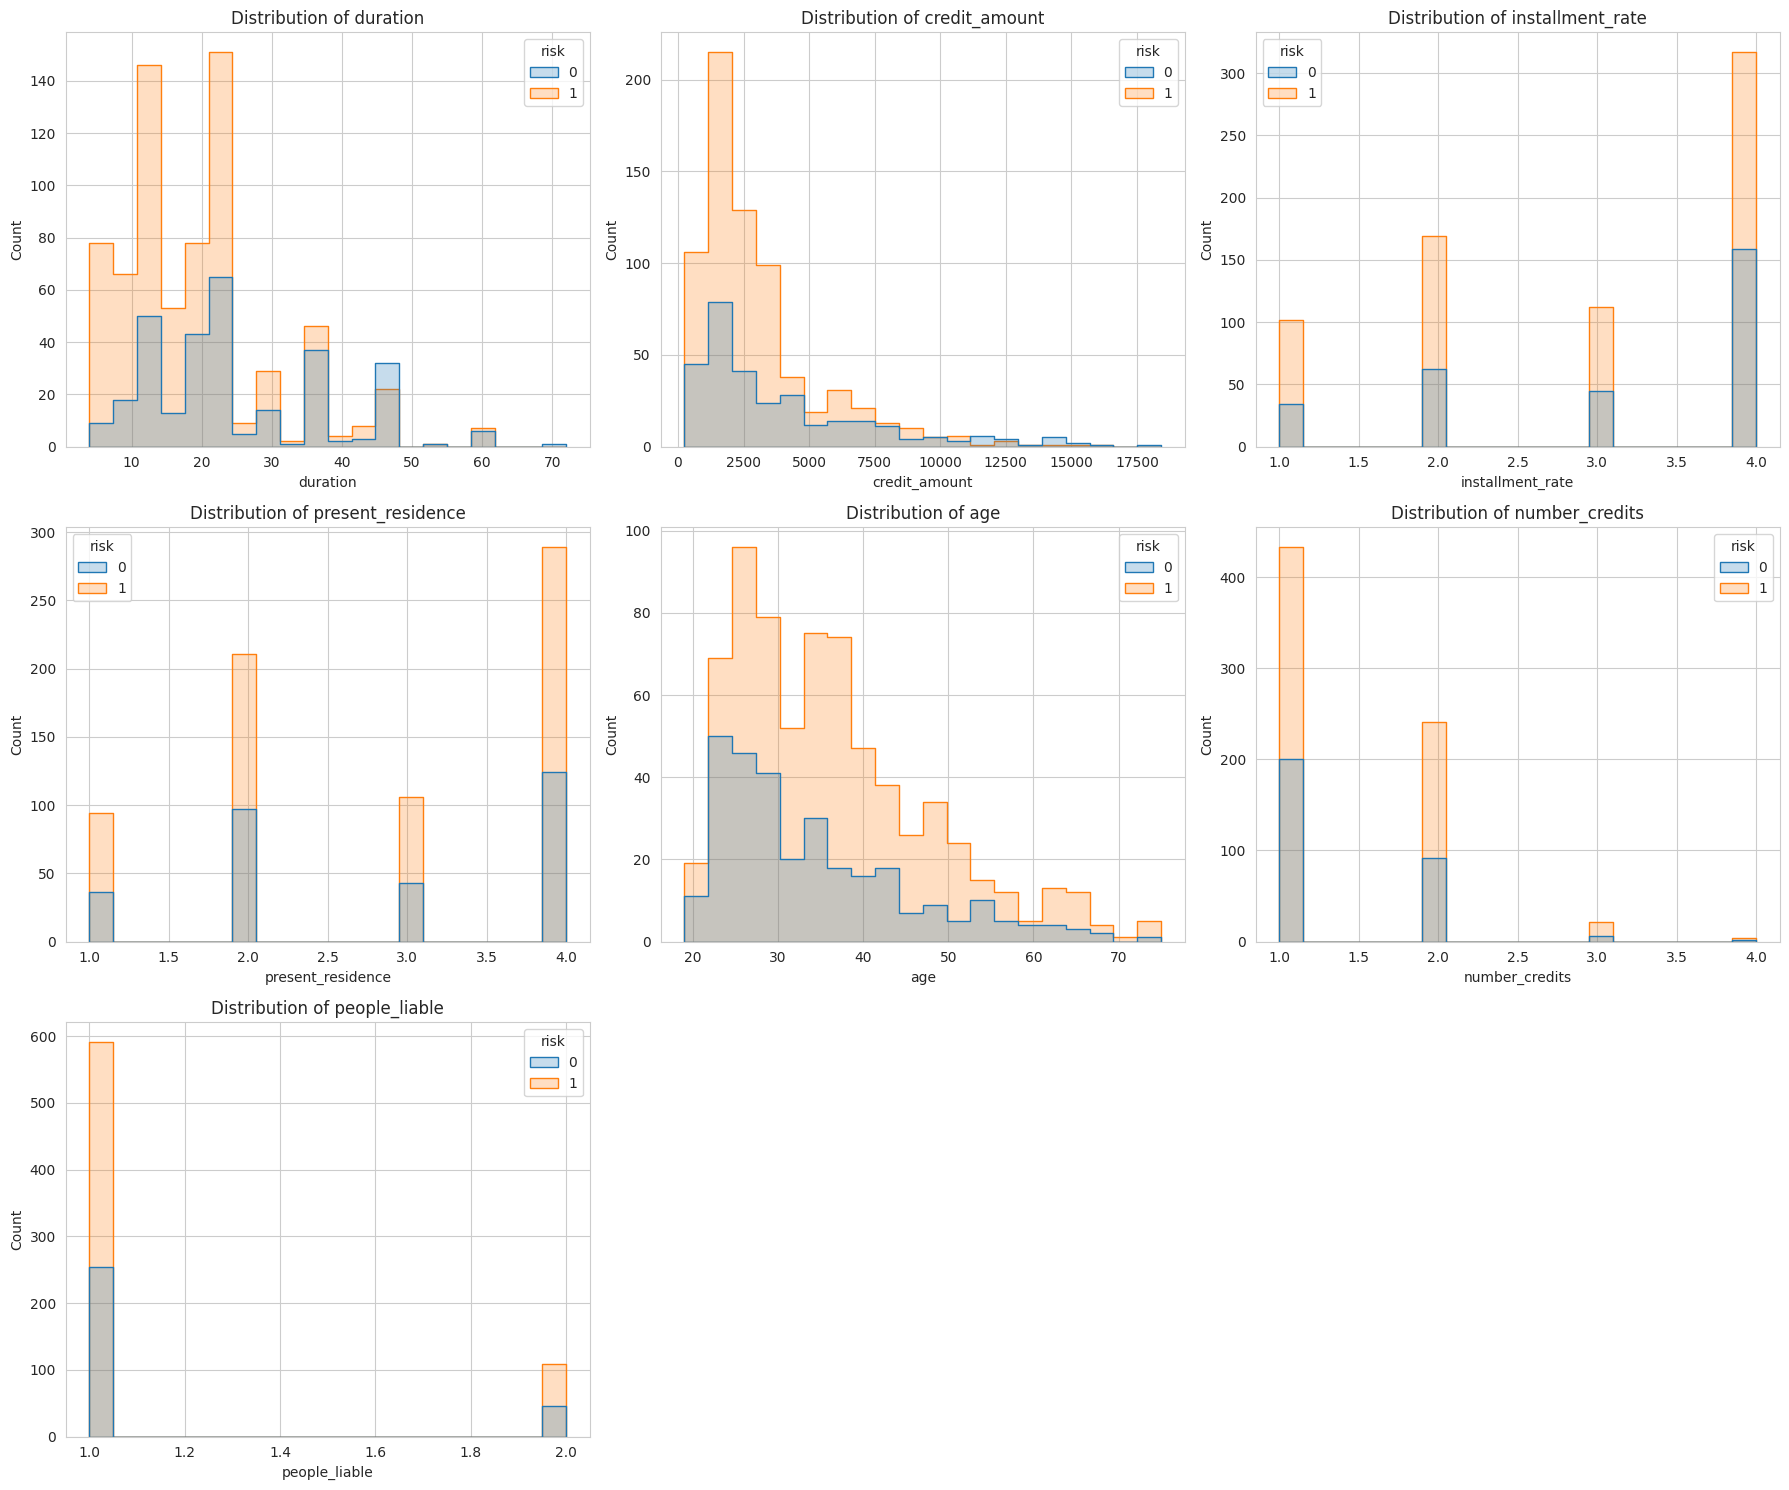

In [13]:
# Histograms for numerical variables
plt.figure(figsize=(18, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='risk', element='step', common_norm=False, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/Histograms for numerical variables.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

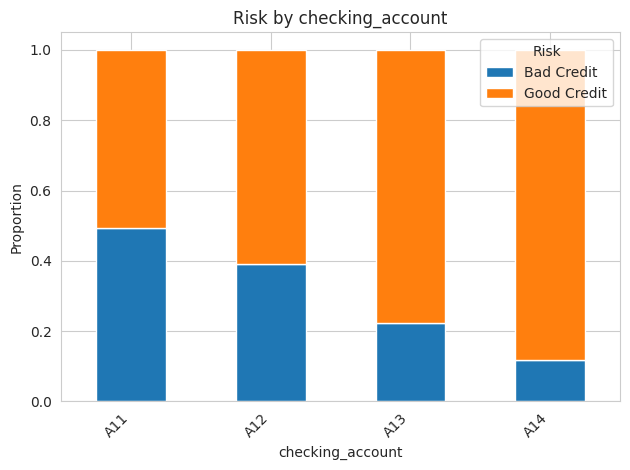


Frequency table for checking_account:


risk,0,1,All,Good %,Bad %
checking_account,,,,,
A11,135,139,274,50.73,49.27
A12,105,164,269,60.97,39.03
A13,14,49,63,77.78,22.22
A14,46,348,394,88.32,11.68
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

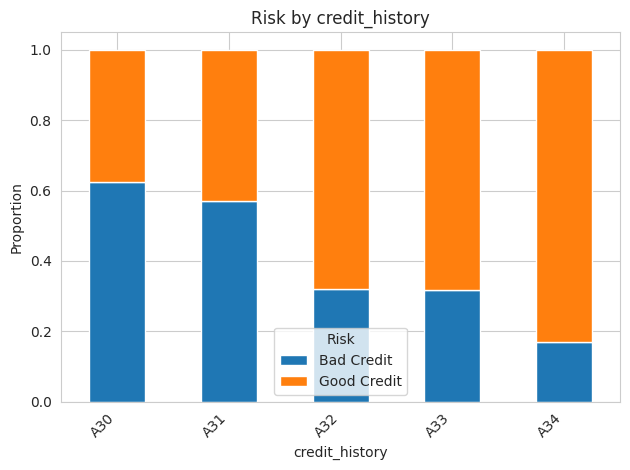


Frequency table for credit_history:


risk,0,1,All,Good %,Bad %
credit_history,,,,,
A30,25,15,40,37.50,62.50
A31,28,21,49,42.86,57.14
A32,169,361,530,68.11,31.89
A33,28,60,88,68.18,31.82
A34,50,243,293,82.94,17.06
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

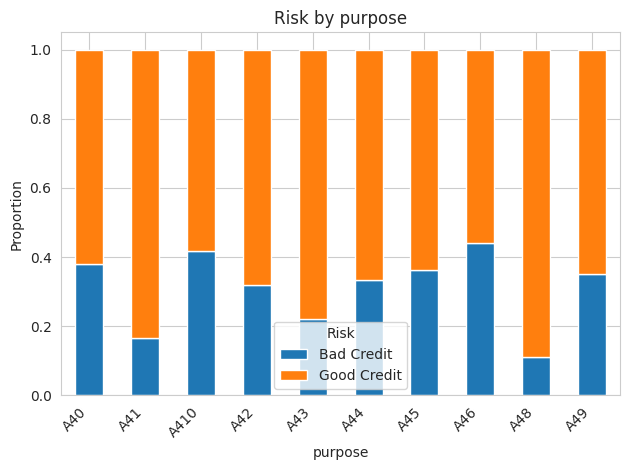


Frequency table for purpose:


risk,0,1,All,Good %,Bad %
purpose,,,,,
A40,89,145,234,61.97,38.03
A41,17,86,103,83.50,16.50
A410,5,7,12,58.33,41.67
A42,58,123,181,67.96,32.04
A43,62,218,280,77.86,22.14
A44,4,8,12,66.67,33.33
A45,8,14,22,63.64,36.36
A46,22,28,50,56.00,44.00
A48,1,8,9,88.89,11.11


<Figure size 1200x600 with 0 Axes>

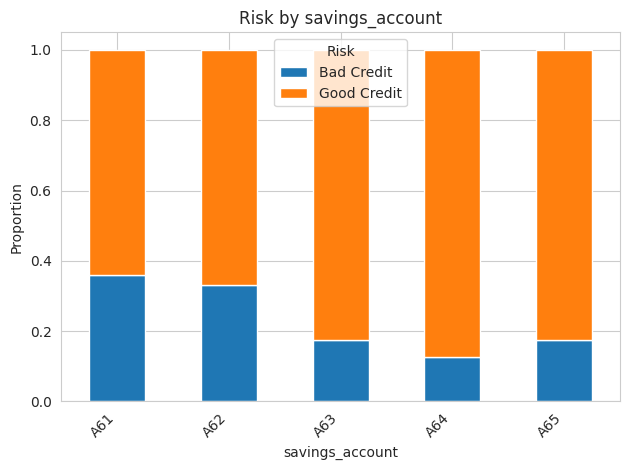


Frequency table for savings_account:


risk,0,1,All,Good %,Bad %
savings_account,,,,,
A61,217,386,603,64.01,35.99
A62,34,69,103,66.99,33.01
A63,11,52,63,82.54,17.46
A64,6,42,48,87.50,12.50
A65,32,151,183,82.51,17.49
All,300,700,1000,70.00,30.00


In [14]:
# Categorical variables analysis
cat_cols = ['checking_account', 'credit_history', 'purpose', 'savings_account',
            'employment_since', 'personal_status_sex', 'other_debtors', 'property',
            'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']

# Create a function to plot categorical variables
def plot_categorical(col):
    plt.figure(figsize=(12, 6))

    # Create a crosstab
    ct = pd.crosstab(df[col], df['risk'], normalize='index')
    ct.plot(kind='bar', stacked=True)

    plt.title(f'Risk by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Risk', labels=['Bad Credit', 'Good Credit'])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Show the frequency table
    freq_table = pd.crosstab(df[col], df['risk'], margins=True)
    freq_table['Good %'] = (freq_table[1] / freq_table['All'] * 100).round(2)
    freq_table['Bad %'] = (freq_table[0] / freq_table['All'] * 100).round(2)
    print(f"\nFrequency table for {col}:")
    display(freq_table)

# Plot the most important categorical variables
important_cats = ['checking_account', 'credit_history', 'purpose', 'savings_account']
for col in important_cats:
    plot_categorical(col)

<Figure size 1200x600 with 0 Axes>

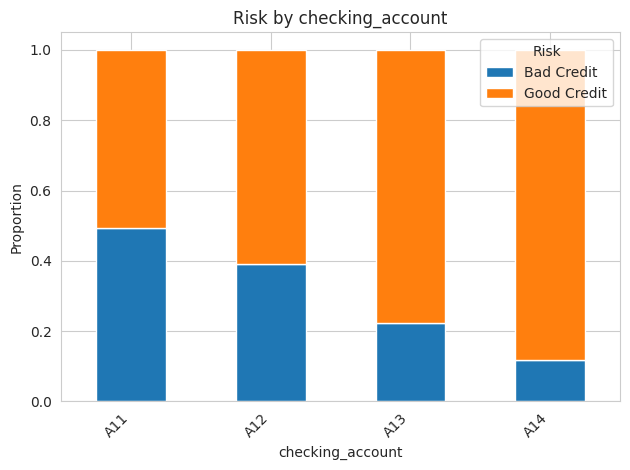


Frequency table for checking_account:


risk,0,1,All,Good %,Bad %
checking_account,,,,,
A11,135,139,274,50.73,49.27
A12,105,164,269,60.97,39.03
A13,14,49,63,77.78,22.22
A14,46,348,394,88.32,11.68
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

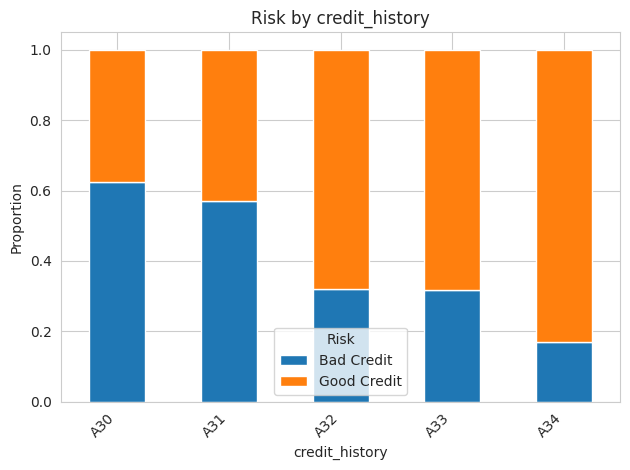


Frequency table for credit_history:


risk,0,1,All,Good %,Bad %
credit_history,,,,,
A30,25,15,40,37.50,62.50
A31,28,21,49,42.86,57.14
A32,169,361,530,68.11,31.89
A33,28,60,88,68.18,31.82
A34,50,243,293,82.94,17.06
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

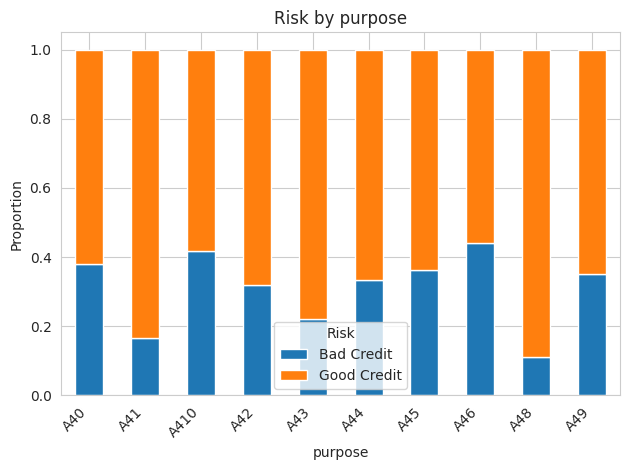


Frequency table for purpose:


risk,0,1,All,Good %,Bad %
purpose,,,,,
A40,89,145,234,61.97,38.03
A41,17,86,103,83.50,16.50
A410,5,7,12,58.33,41.67
A42,58,123,181,67.96,32.04
A43,62,218,280,77.86,22.14
A44,4,8,12,66.67,33.33
A45,8,14,22,63.64,36.36
A46,22,28,50,56.00,44.00
A48,1,8,9,88.89,11.11


<Figure size 1200x600 with 0 Axes>

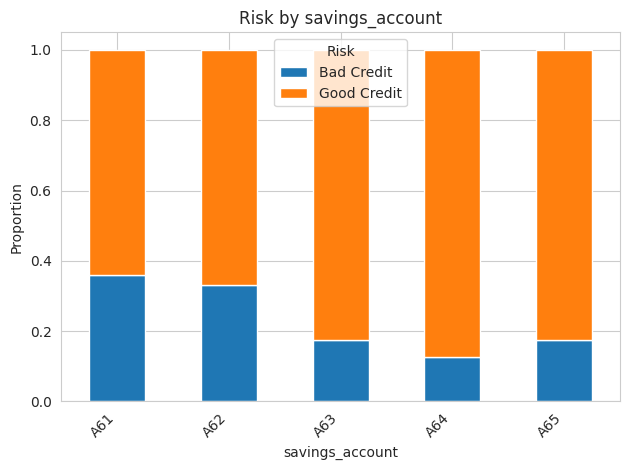


Frequency table for savings_account:


risk,0,1,All,Good %,Bad %
savings_account,,,,,
A61,217,386,603,64.01,35.99
A62,34,69,103,66.99,33.01
A63,11,52,63,82.54,17.46
A64,6,42,48,87.50,12.50
A65,32,151,183,82.51,17.49
All,300,700,1000,70.00,30.00


In [15]:
# Plot the most important categorical variables
important_cats = ['checking_account', 'credit_history', 'purpose', 'savings_account']
for col in important_cats:
    plot_categorical(col)

<Figure size 1200x600 with 0 Axes>

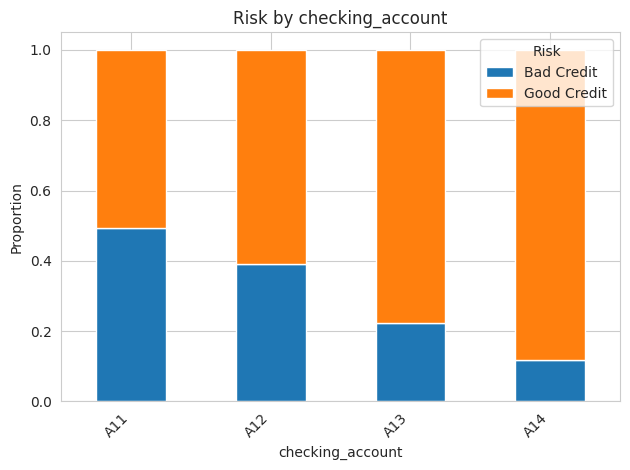


Frequency table for checking_account:


risk,0,1,All,Good %,Bad %
checking_account,,,,,
A11,135,139,274,50.73,49.27
A12,105,164,269,60.97,39.03
A13,14,49,63,77.78,22.22
A14,46,348,394,88.32,11.68
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

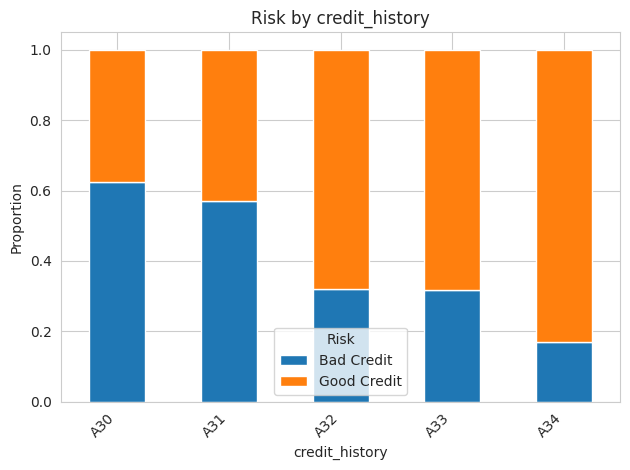


Frequency table for credit_history:


risk,0,1,All,Good %,Bad %
credit_history,,,,,
A30,25,15,40,37.50,62.50
A31,28,21,49,42.86,57.14
A32,169,361,530,68.11,31.89
A33,28,60,88,68.18,31.82
A34,50,243,293,82.94,17.06
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

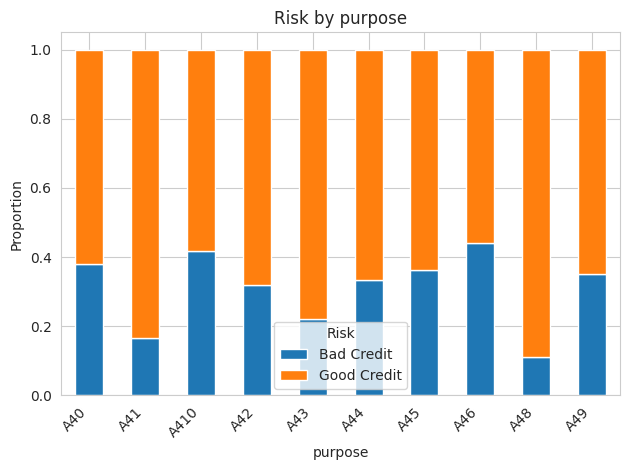


Frequency table for purpose:


risk,0,1,All,Good %,Bad %
purpose,,,,,
A40,89,145,234,61.97,38.03
A41,17,86,103,83.50,16.50
A410,5,7,12,58.33,41.67
A42,58,123,181,67.96,32.04
A43,62,218,280,77.86,22.14
A44,4,8,12,66.67,33.33
A45,8,14,22,63.64,36.36
A46,22,28,50,56.00,44.00
A48,1,8,9,88.89,11.11


<Figure size 1200x600 with 0 Axes>

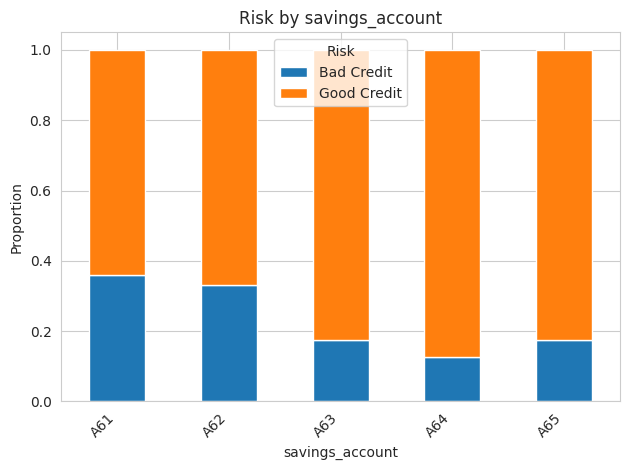


Frequency table for savings_account:


risk,0,1,All,Good %,Bad %
savings_account,,,,,
A61,217,386,603,64.01,35.99
A62,34,69,103,66.99,33.01
A63,11,52,63,82.54,17.46
A64,6,42,48,87.50,12.50
A65,32,151,183,82.51,17.49
All,300,700,1000,70.00,30.00


In [16]:
# Plot the most important categorical variables
important_cats = ['checking_account', 'credit_history', 'purpose', 'savings_account']
for col in important_cats:
    plot_categorical(col)

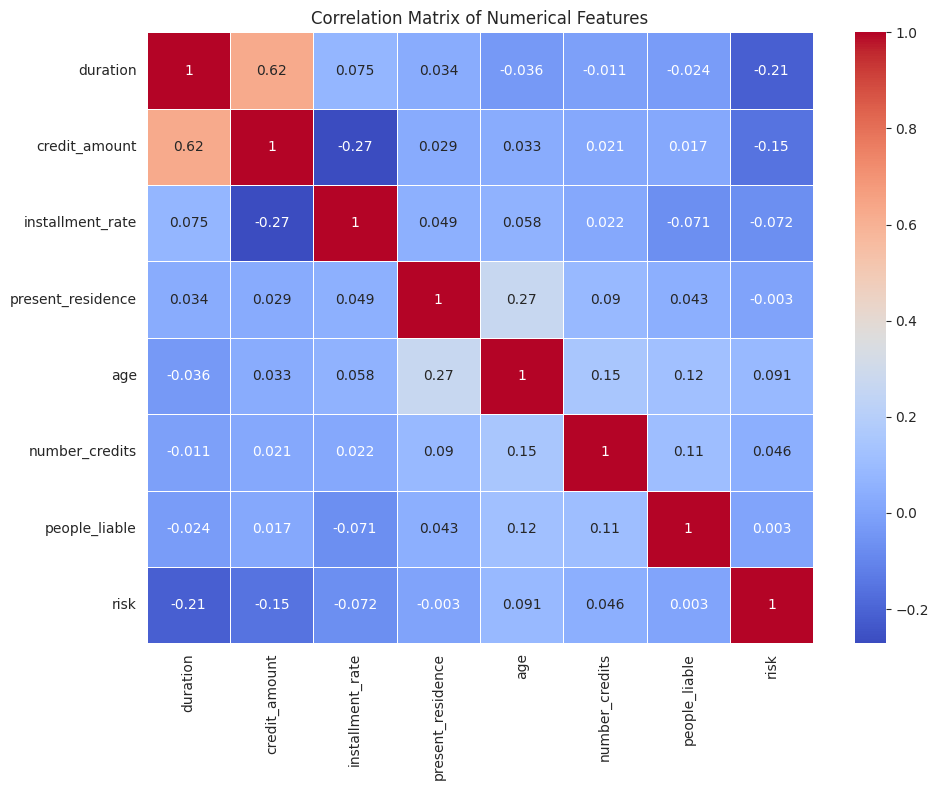

In [17]:
# Correlation analysis for numerical features
plt.figure(figsize=(10, 8))
numerical_df = df[num_cols + ['risk']]
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/Correlation Matrix of Numerical Features.png')
plt.show()

In [ ]:
# Feature Engineering


In [18]:
# Basic demographic features

# Age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Loan-related features
# Credit amount groups
df['credit_amount_group'] = pd.qcut(df['credit_amount'], q=4,
                                   labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Loan duration groups (in months)
df['duration_group'] = pd.cut(df['duration'], bins=[0, 12, 24, 36, 48, 100],
                             labels=['0-12', '13-24', '25-36', '37-48', '48+'])

# Credit amount per duration (monthly payment)
df['credit_per_month'] = df['credit_amount'] / df['duration']


# Employment and savings features

# Employment stability categories
employment_map = {
    'A71': 'unemployed',
    'A72': '<1 year',
    'A73': '1-4 years',
    'A74': '4-7 years',
    'A75': '7+ years'
}
df['employment_stability'] = df['employment_since'].map(employment_map)

# Simplify savings categories
savings_map = {
    'A61': 'little',
    'A62': 'moderate',
    'A63': 'quite rich',
    'A64': 'rich',
    'A65': 'unknown'
}
df['savings_status'] = df['savings_account'].map(savings_map)

# Credit history simplification

credit_history_map = {
    'A30': 'no_credits',
    'A31': 'good_credits',
    'A32': 'delayed_payments',
    'A33': 'critical_account',
    'A34': 'other_credits'
}
df['credit_history_simple'] = df['credit_history'].map(credit_history_map)

In [19]:
# 5. Advanced ratio features

# Age-to-credit ratio
df['age_to_credit_ratio'] = df['age'] / df['credit_amount']

# Debt-to-income proxy (using installment rate as a proxy for income)
df['debt_burden'] = df['credit_amount'] / df['installment_rate']

# Credit amount to duration ratio (different perspective than credit_per_month)
df['credit_to_duration_ratio'] = df['credit_amount'] / df['duration']

In [20]:
# Risk flag features

# Flag for young borrowers with high credit amounts
df['young_high_credit_flag'] = ((df['age'] < 30) &
                                (df['credit_amount'] > df['credit_amount'].quantile(0.75))).astype(int)

# Flag for long duration, high amount loans
df['high_exposure_flag'] = ((df['duration'] > 24) &
                           (df['credit_amount'] > df['credit_amount'].quantile(0.75))).astype(int)

# Flag for critical customers with high credit amounts
df['critical_high_amount_flag'] = ((df['credit_history'] == 'A33') &
                                   (df['credit_amount'] > df['credit_amount'].median())).astype(int)

# Flag for no checking account and high credit amount
df['no_checking_high_credit_flag'] = ((df['checking_account'] == 'A14') &
                                      (df['credit_amount'] > df['credit_amount'].quantile(0.75))).astype(int)

In [21]:
# Interaction features

# Create numerical risk mappings for categorical variables
checking_risk = {'A11': 3, 'A12': 2, 'A13': 1, 'A14': 0}  # Higher number = higher risk
history_risk = {'A30': 0, 'A31': 0, 'A32': 1, 'A33': 2, 'A34': 1}  # Higher number = higher risk
savings_risk = {'A61': 3, 'A62': 2, 'A63': 1, 'A64': 0, 'A65': 2}  # Higher number = higher risk

df['checking_risk'] = df['checking_account'].map(checking_risk)
df['history_risk'] = df['credit_history'].map(history_risk)
df['savings_risk'] = df['savings_account'].map(savings_risk)

# Combined risk scores
df['combined_account_risk'] = df['checking_risk'] + df['history_risk'] + df['savings_risk']

# Duration × credit history risk interaction
df['duration_history_interaction'] = df['duration'] * df['history_risk']

# Credit amount × checking account risk interaction
df['amount_checking_interaction'] = df['credit_amount'] * df['checking_risk']

Distribution of newly created features:


<Figure size 1200x600 with 0 Axes>

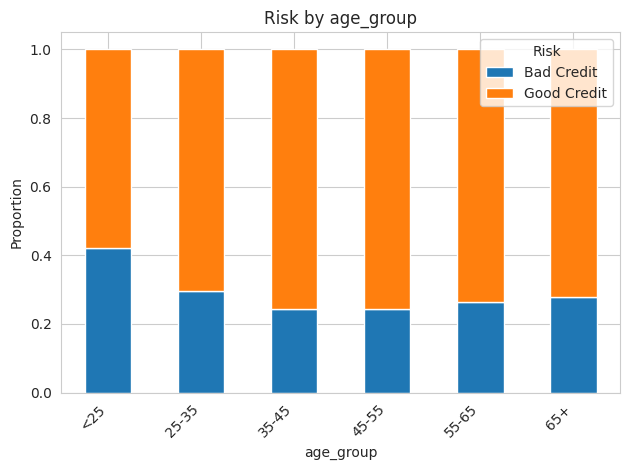


Frequency table for age_group:


risk,0,1,All,Good %,Bad %
age_group,,,,,
<25,80,110,190,57.89,42.11
25-35,118,280,398,70.35,29.65
35-45,55,171,226,75.66,24.34
45-55,28,87,115,75.65,24.35
55-65,14,39,53,73.58,26.42
65+,5,13,18,72.22,27.78
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

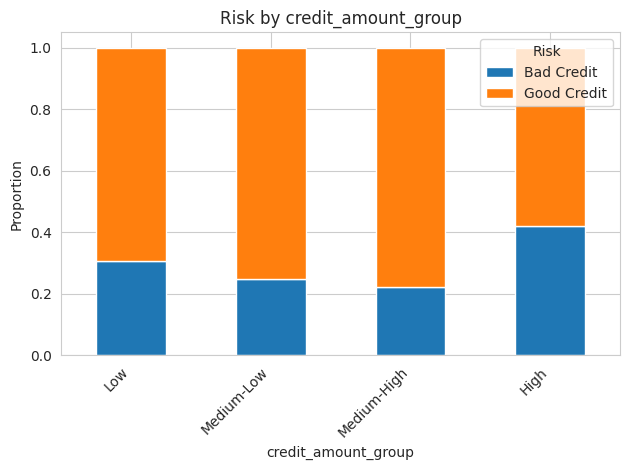


Frequency table for credit_amount_group:


risk,0,1,All,Good %,Bad %
credit_amount_group,,,,,
Low,77,173,250,69.2,30.8
Medium-Low,62,188,250,75.2,24.8
Medium-High,56,194,250,77.6,22.4
High,105,145,250,58.0,42.0
All,300,700,1000,70.0,30.0


<Figure size 1200x600 with 0 Axes>

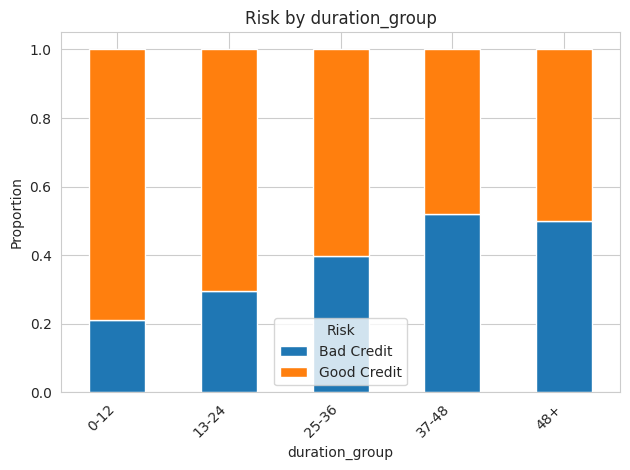


Frequency table for duration_group:


risk,0,1,All,Good %,Bad %
duration_group,,,,,
0-12,76,283,359,78.83,21.17
13-24,122,289,411,70.32,29.68
25-36,57,86,143,60.14,39.86
37-48,37,34,71,47.89,52.11
48+,8,8,16,50.00,50.00
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

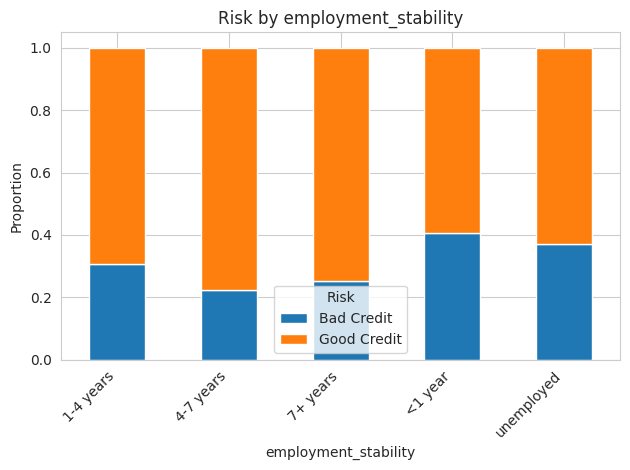


Frequency table for employment_stability:


risk,0,1,All,Good %,Bad %
employment_stability,,,,,
1-4 years,104,235,339,69.32,30.68
4-7 years,39,135,174,77.59,22.41
7+ years,64,189,253,74.70,25.30
<1 year,70,102,172,59.30,40.70
unemployed,23,39,62,62.90,37.10
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

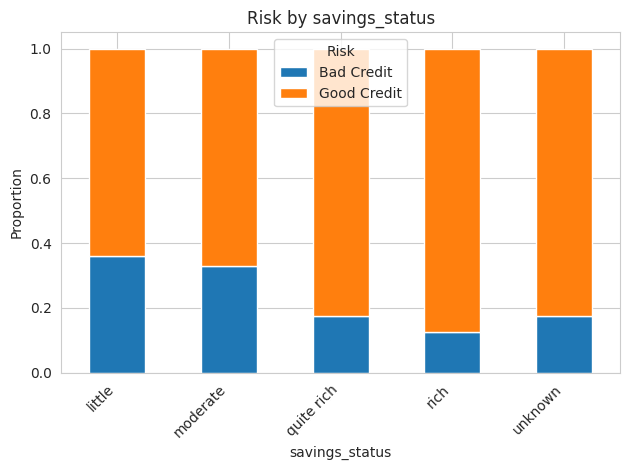


Frequency table for savings_status:


risk,0,1,All,Good %,Bad %
savings_status,,,,,
little,217,386,603,64.01,35.99
moderate,34,69,103,66.99,33.01
quite rich,11,52,63,82.54,17.46
rich,6,42,48,87.50,12.50
unknown,32,151,183,82.51,17.49
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

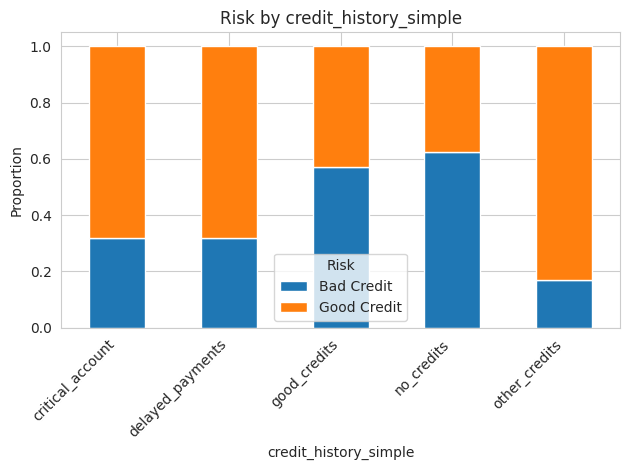


Frequency table for credit_history_simple:


risk,0,1,All,Good %,Bad %
credit_history_simple,,,,,
critical_account,28,60,88,68.18,31.82
delayed_payments,169,361,530,68.11,31.89
good_credits,28,21,49,42.86,57.14
no_credits,25,15,40,37.50,62.50
other_credits,50,243,293,82.94,17.06
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

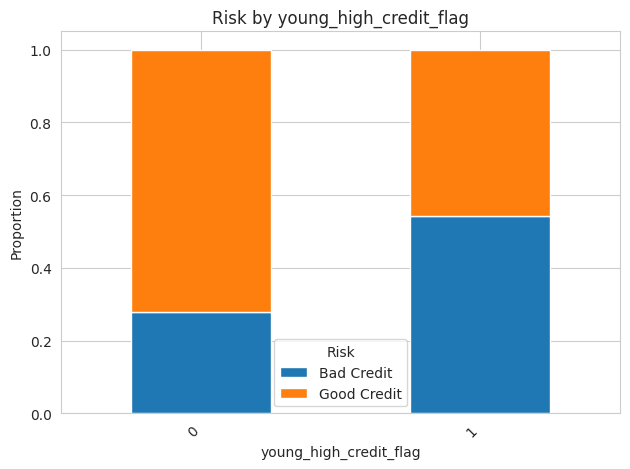


Frequency table for young_high_credit_flag:


risk,0,1,All,Good %,Bad %
young_high_credit_flag,,,,,
0,254,661,915,72.24,27.76
1,46,39,85,45.88,54.12
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

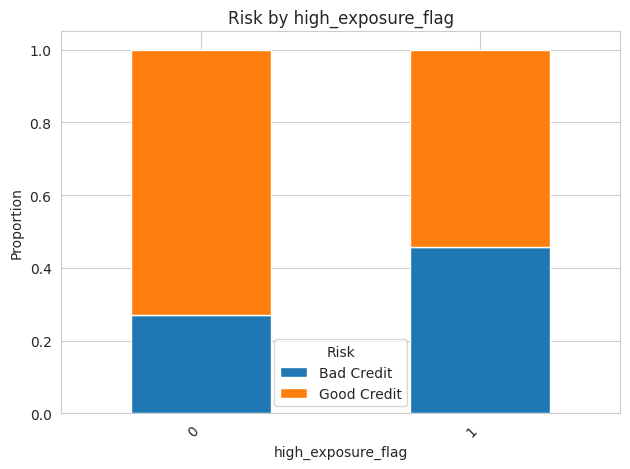


Frequency table for high_exposure_flag:


risk,0,1,All,Good %,Bad %
high_exposure_flag,,,,,
0,230,617,847,72.85,27.15
1,70,83,153,54.25,45.75
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

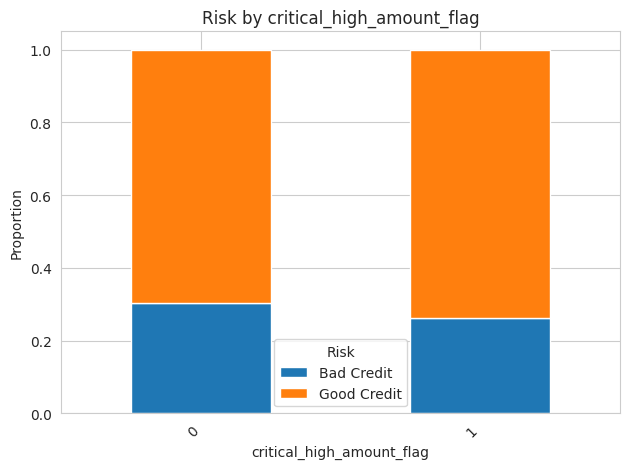


Frequency table for critical_high_amount_flag:


risk,0,1,All,Good %,Bad %
critical_high_amount_flag,,,,,
0,285,658,943,69.78,30.22
1,15,42,57,73.68,26.32
All,300,700,1000,70.00,30.00


<Figure size 1200x600 with 0 Axes>

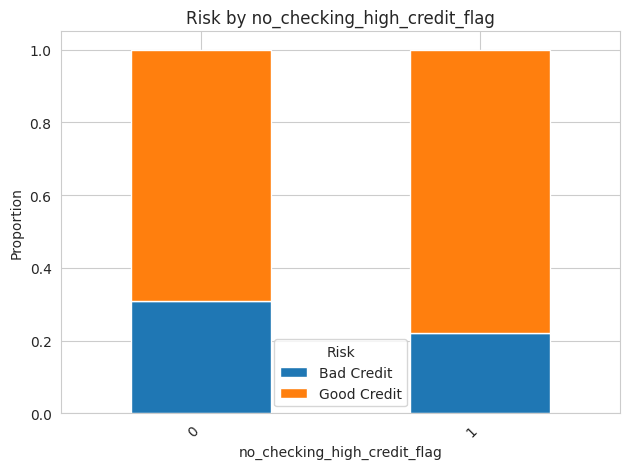


Frequency table for no_checking_high_credit_flag:


risk,0,1,All,Good %,Bad %
no_checking_high_credit_flag,,,,,
0,280,629,909,69.20,30.80
1,20,71,91,78.02,21.98
All,300,700,1000,70.00,30.00


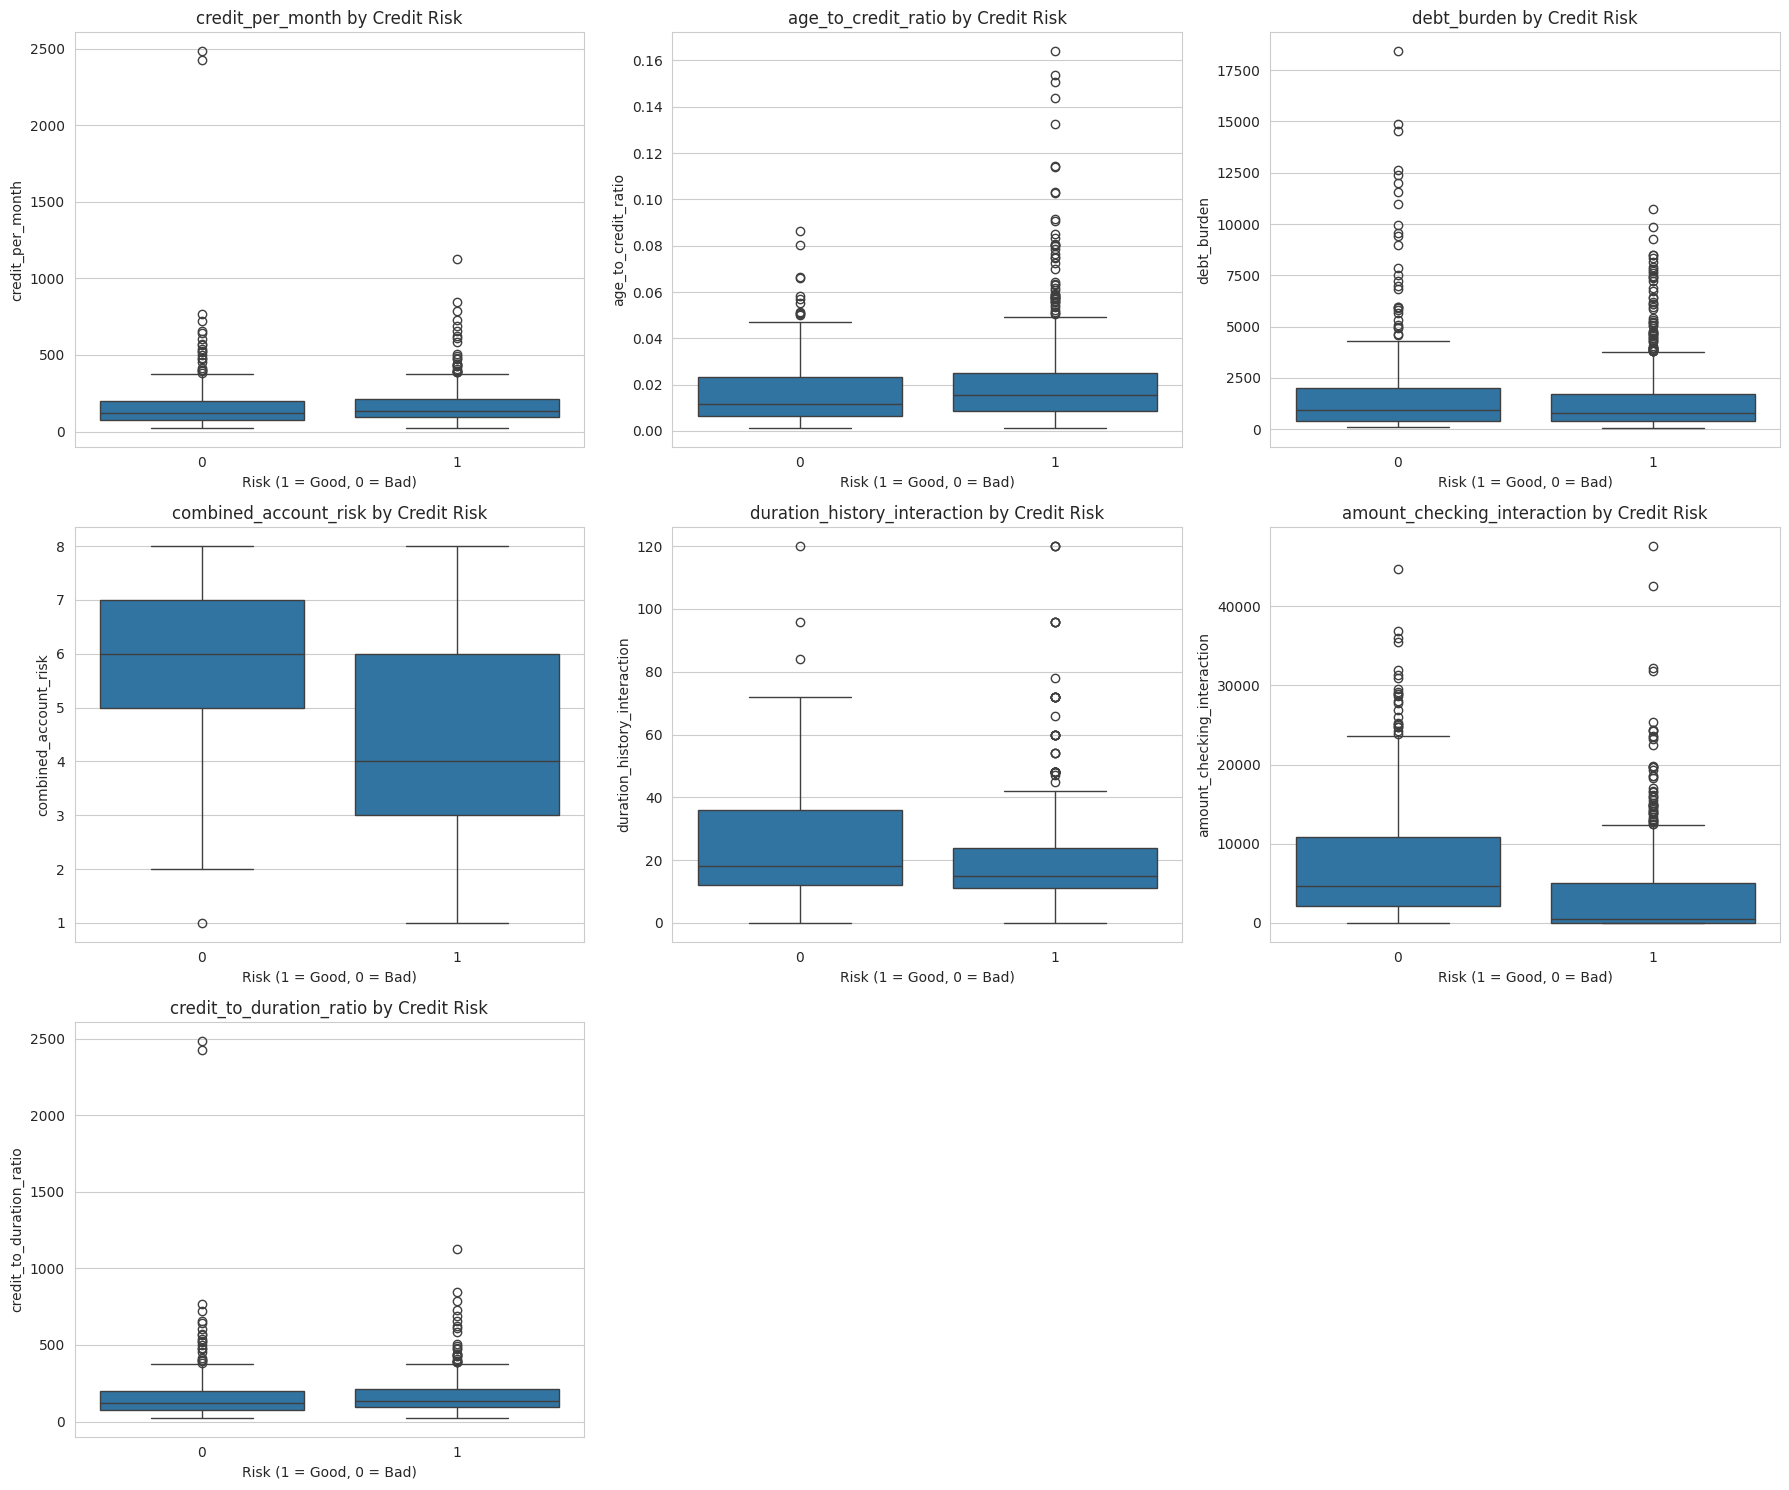

In [22]:
# 8. Analyze distributions of new features

print("Distribution of newly created features:")

# Analyze categorical features
categorical_engineered = ['age_group', 'credit_amount_group', 'duration_group',
                         'employment_stability', 'savings_status', 'credit_history_simple']

for col in categorical_engineered:
    plot_categorical(col)

# Analyze flag features
flag_features = ['young_high_credit_flag', 'high_exposure_flag',
                'critical_high_amount_flag', 'no_checking_high_credit_flag']

for col in flag_features:
    plot_categorical(col)

# Analyze numerical features
numerical_engineered = ['credit_per_month', 'age_to_credit_ratio', 'debt_burden',
                       'combined_account_risk', 'duration_history_interaction',
                       'amount_checking_interaction', 'credit_to_duration_ratio']

plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_engineered, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='risk', y=col, data=df)
    plt.title(f'{col} by Credit Risk')
    plt.xlabel('Risk (1 = Good, 0 = Bad)')
plt.tight_layout()
plt.show()

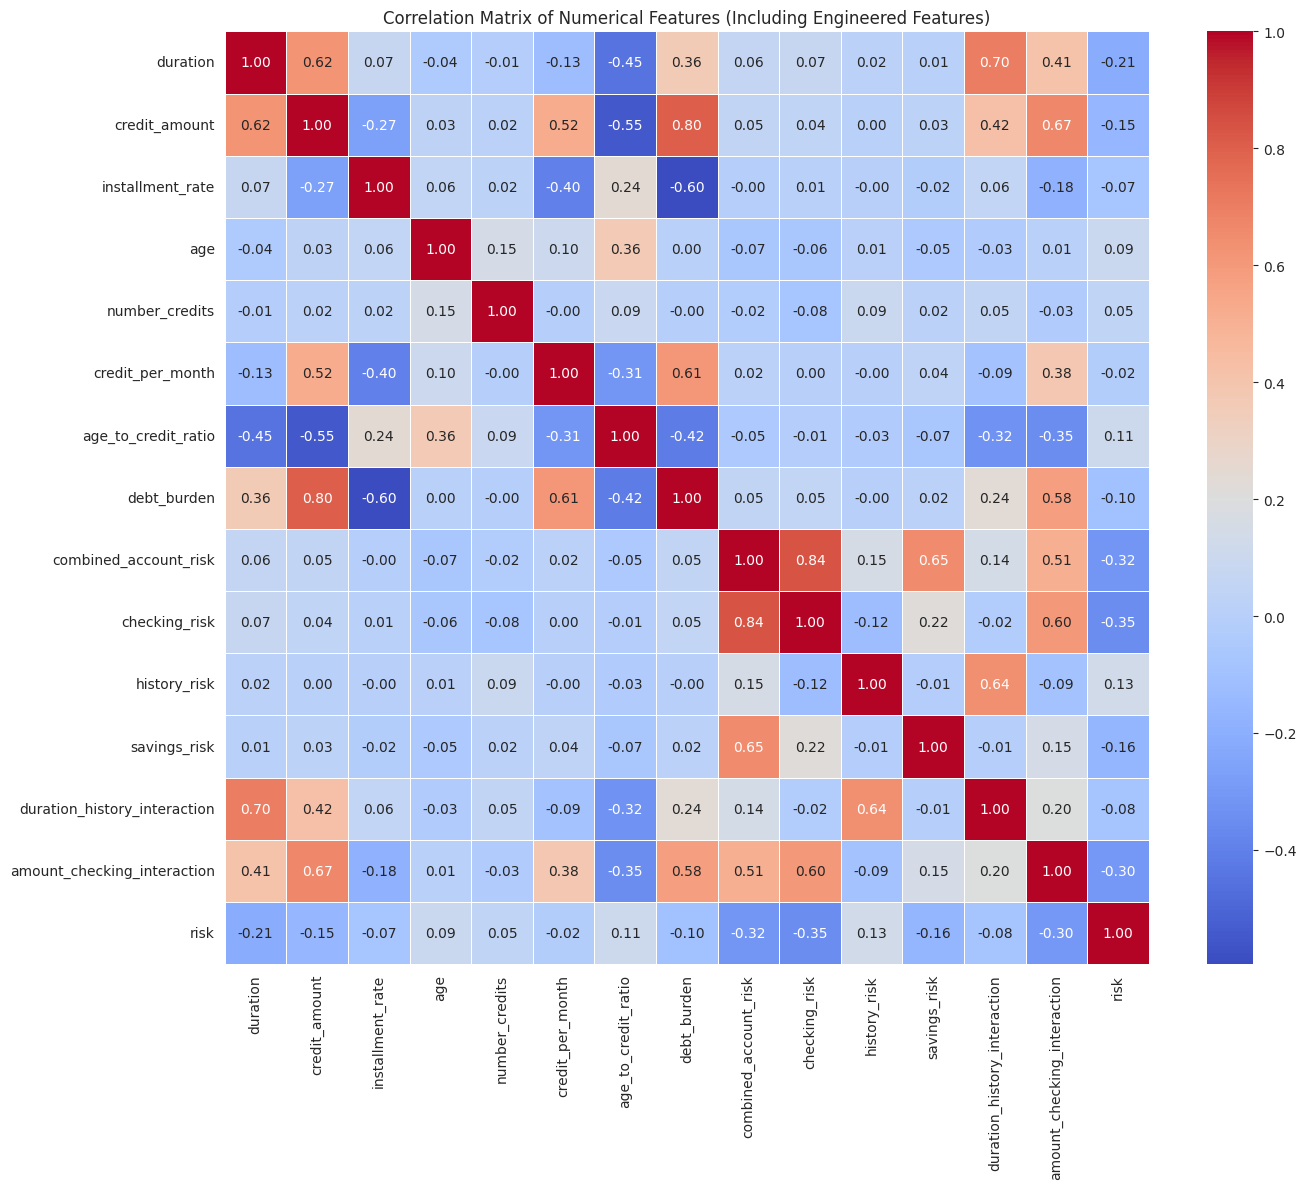

In [23]:
# Correlation analysis of engineered features

# Select numerical features for correlation analysis
numerical_cols = ['duration', 'credit_amount', 'installment_rate', 'age', 'number_credits',
                 'credit_per_month', 'age_to_credit_ratio', 'debt_burden',
                 'combined_account_risk', 'checking_risk', 'history_risk', 'savings_risk',
                 'duration_history_interaction', 'amount_checking_interaction']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols + ['risk']].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features (Including Engineered Features)')
plt.tight_layout()
plt.show()

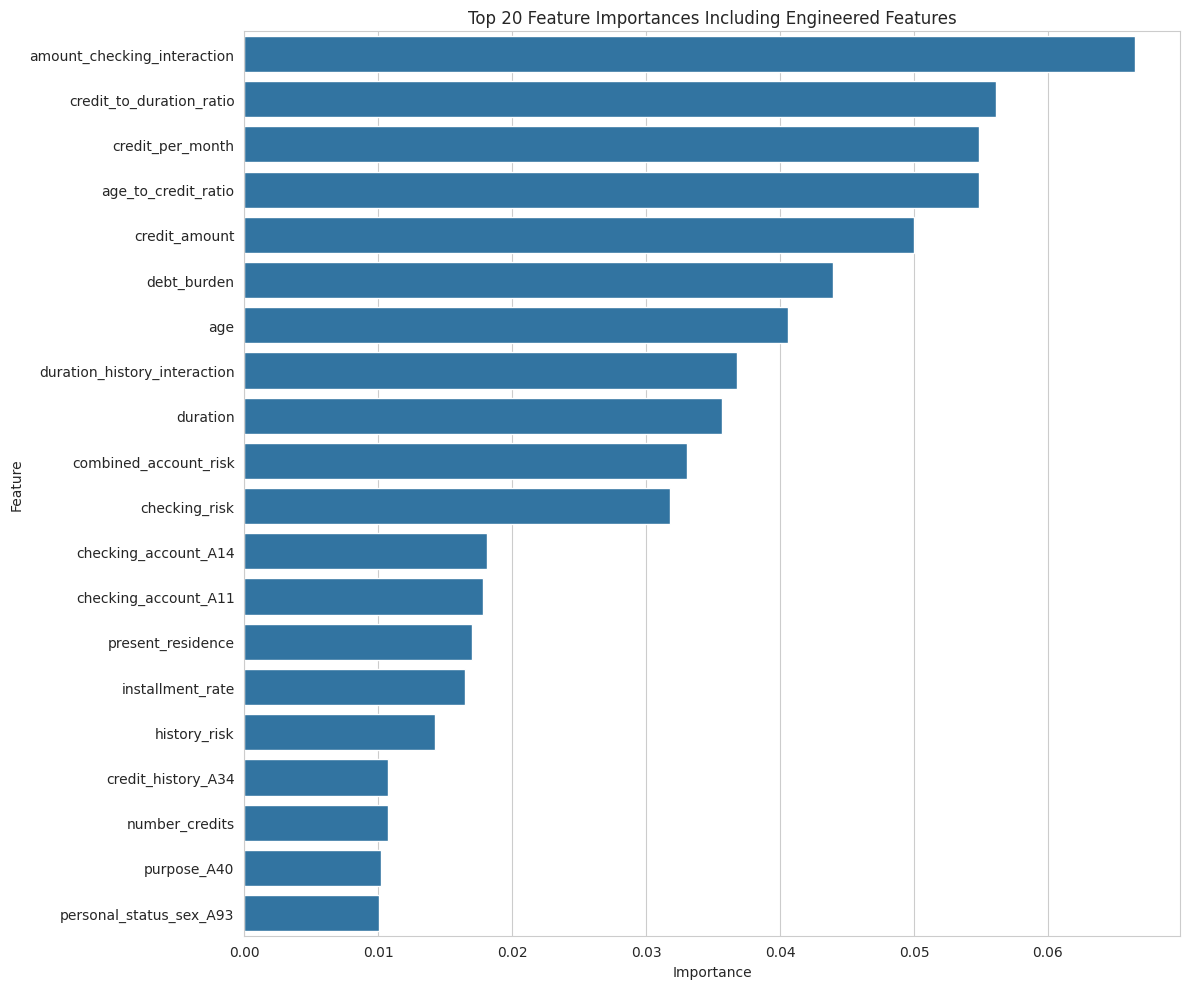

,Feature,Importance
20,amount_checking_interaction,0.066538
10,credit_to_duration_ratio,0.056162
7,credit_per_month,0.054833
8,age_to_credit_ratio,0.054824
1,credit_amount,0.049969
9,debt_burden,0.043948
4,age,0.040584
19,duration_history_interaction,0.036796
0,duration,0.035696
18,combined_account_risk,0.033056


In [24]:
# Identify the label column
label_column = 'risk'

# Identify columns for modeling (we will include engineered features now)
feature_cols = [col for col in df.columns if col != label_column]

# Identify numerical and categorical columns
numerical_features = [col for col in feature_cols if df[col].dtype in ['int64', 'float64']]
categorical_features = [col for col in feature_cols if df[col].dtype == 'object']

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and fit the model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Define features and target variable
X = df[feature_cols]
y = df[label_column]

# Train the model
rf_model.fit(X, y)

# Extract feature names
feature_names = numerical_features.copy()

# Get names for One-Hot Encoded columns
categorical_encoder = preprocessor.named_transformers_['cat']
onehot_feature_names = categorical_encoder.named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names.extend(onehot_feature_names)

# Extract feature importances
importances = rf_model.named_steps['classifier'].feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 10))
sns.barplot(y='Feature', x='Importance', data=importance_df.head(20))
plt.title('Top 20 Feature Importances Including Engineered Features')
plt.tight_layout()
plt.show()

# Display the full DataFrame of importance scores
importance_df.head(20)


In [25]:
# 11. Save the engineered features for model training

# Save the processed dataframe for later use
df.to_csv('/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/engineered_credit_data.csv', index=False)

print(f"Engineered dataset saved to: '/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/engineered_credit_data.csv'")
print(f"Total features after engineering: {len(df.columns) - 1}")  # Excluding the target variable

Engineered dataset saved to: '/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/engineered_credit_data.csv'
Total features after engineering: 40


In [ ]:
!pip install confluent_kafka

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.3 MB/s eta 0:00:00


In [ ]:
!pip install hopsworks[python]

  Using cached hopsworks-4.1.8-py3-none-any.whl.metadata (11 kB)
  Using cached avro-1.11.3-py2.py3-none-any.whl
Using cached hopsworks-4.1.8-py3-none-any.whl (646 kB)
  Attempting uninstall: avro
    Found existing installation: avro 1.11.0
    Uninstalling avro-1.11.0:
      Successfully uninstalled avro-1.11.0


In [26]:
import pandas as pd
import hopsworks
import json
import os
import warnings
import hopsworks
warnings.filterwarnings("ignore")


# Load your Hopsworks API key from file
with open('/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/kokoro.txt', 'r') as file:
    os.environ["HOPSWORKS_API_KEY"] = file.read().strip()

# Log into Hopsworks
project = hopsworks.login()
fs = project.get_feature_store()


Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1218709


In [27]:
# Load the engineered dataset
file_path = 'C:/Users/joyou/Documents/Data Science Projects/Credit Risk Assessmemt/engineered_credit_data.csv'
engineered_df = pd.read_csv(file_path)

# Step 1: Add a Primary Key column
engineered_df['index'] = engineered_df.index  # Create a unique ID for each row


# Step 3: Define Feature Group
feature_group = fs.create_feature_group(
    name="credit_risk_assessment",
    version=1,
    description="Engineered dataset for credit risk assessment",
    primary_key=['index'],
    online_enabled=True
)

# Step 4: Insert the dataset into the Feature Store
feature_group.insert(engineered_df)

print("✅ Feature group successfully created and saved to Hopsworks Feature Store.")


Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1218709/fs/1205318/fg/1421067


Uploading Dataframe: 100.00% |██████████| Rows 1000/1000 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: credit_risk_assessment_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1218709/jobs/named/credit_risk_assessment_1_offline_fg_materialization/executions
✅ Feature group successfully created and saved to Hopsworks Feature Store.


In [ ]:
!pip show hsfs

In [28]:
# Connect to Hopsworks
conn = hopsworks.login()
fs = conn.get_feature_store()

# Get Feature Group
feature_group = fs.get_feature_group(
    name="credit_risk_assessment",
    version=1
)

# --- Create Feature View ---
# Check if the feature group includes the label column "risk"
feature_view = fs.create_feature_view(
    name="credit_risk_assessment_view",
    version=1,
    query=feature_group.select_all(),  # Ensure "risk" is part of the feature group
    labels=["risk"]  # "risk" must be a column in the feature group
)

print("✅ Feature View created")



Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1218709
Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1218709/fs/1205318/fv/credit_risk_assessment_view/version/1
✅ Feature View created


In [32]:
# List all available training datasets for this feature view
available_training_datasets = feature_view.get_training_datasets()
print("Available training datasets:", available_training_datasets)


Available training datasets: []


In [33]:
# Create a training dataset if one doesn't exist
feature_view.create_training_data()

# # Then fetch it
# training_features, training_labels = feature_view.get_training_data()

Finished: Materializing data to Hopsworks, using Hopsworks Feature Query Service (1.17s) 


(1,
 b'/Projects/fraud_detection_jp/fraud_detection_jp_Training_Datasets/credit_risk_assessment_view_1_1/credit_risk_assessment_view_1/part-00000.parquet')

In [34]:
# Fetch the training data
training_features, training_labels = feature_view.get_training_data(
    training_dataset_version=1  # Match the version of the training data
)

# Combine features and labels if you want a single DataFrame
training_data = pd.concat([training_features, training_labels], axis=1)

# Cleanup (if "index" is part of the feature group's primary key)
if 'index' in training_data.columns:
    training_data = training_data.drop(columns=['index'])

print(f"✅ Dataset shape: {training_data.shape}")
training_data.head()

✅ Dataset shape: (1000, 41)


,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,age_group,credit_amount_group,duration_group,credit_per_month,employment_stability,savings_status,credit_history_simple,age_to_credit_ratio,debt_burden,credit_to_duration_ratio,young_high_credit_flag,high_exposure_flag,critical_high_amount_flag,no_checking_high_credit_flag,checking_risk,history_risk,savings_risk,combined_account_risk,duration_history_interaction,amount_checking_interaction,risk
0,A11,18,A32,A43,2389,A61,A72,4,A92,A101,1,A123,27,A142,A152,1,A173,1,A191,A201,25-35,Medium-High,13-24,132.722222,<1 year,little,delayed_payments,0.011302,597.250000,132.722222,0,0,0,0,3,1,3,7,18,7167,1
1,A11,9,A32,A43,1364,A61,A74,3,A93,A101,4,A121,59,A143,A152,1,A173,1,A191,A201,55-65,Low,0-12,151.555556,4-7 years,little,delayed_payments,0.043255,454.666667,151.555556,0,0,0,0,3,1,3,7,9,4092,1
2,A11,6,A32,A43,2647,A63,A73,2,A93,A101,3,A121,44,A143,A151,1,A173,2,A191,A201,35-45,Medium-High,0-12,441.166667,1-4 years,quite rich,delayed_payments,0.016623,1323.500000,441.166667,0,0,0,0,3,1,1,5,6,7941,1
3,A11,12,A32,A43,2214,A61,A73,4,A93,A101,3,A122,24,A143,A152,1,A172,1,A191,A201,<25,Medium-Low,0-12,184.500000,1-4 years,little,delayed_payments,0.010840,553.500000,184.500000,0,0,0,0,3,1,3,7,12,6642,1
4,A14,48,A34,A49,7629,A65,A75,4,A91,A101,2,A123,46,A141,A152,2,A174,2,A191,A201,45-55,High,37-48,158.937500,7+ years,unknown,other_credits,0.006030,1907.250000,158.937500,0,1,0,1,0,1,2,3,48,0,1


In [35]:
# --------------------------------------------------
# STEP 1: Connect to Hopsworks & Retrieve Data
# --------------------------------------------------
project = hopsworks.login()
fs = project.get_feature_store()
feature_view = fs.get_feature_view(name="credit_risk_assessment_view", version=1)
X, y = feature_view.get_training_data(training_dataset_version=1)

# Convert labels to 1D array
if isinstance(y, pd.DataFrame):
    y = y.squeeze()

# Identify feature types
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1218709


In [40]:
# --------------------------------------------------
# STEP 2: Create Preprocessing Pipeline
# --------------------------------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_features)
])

# Apply preprocessing before SMOTE
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# NEW ADDITION: Get the feature names after preprocessing
cat_feature_names = []
for i, feature in enumerate(categorical_features):
    encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    categories = encoder.categories_[i]
    for category in categories:
        cat_feature_names.append(f"{feature}_{category}")

# Combine with numerical feature names
all_feature_names = numerical_features + cat_feature_names
print(f"Total features after preprocessing: {len(all_feature_names)}")

# Save feature names for later use
import joblib
joblib.dump(all_feature_names, '/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/feature_names.pkl')

# Handle class imbalance with SMOTE after preprocessing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)


Total features after preprocessing: 106


In [37]:
# --------------------------------------------------
# STEP 3: Define Models & Hyperparameter Search Spaces
# --------------------------------------------------
models = {
    "RandomForest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 5, None],
            'classifier__min_samples_split': [2, 5],
            'classifier__max_features': ['sqrt', 'log2']
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(class_weight='balanced', random_state=42),
        "params": {
            'classifier__C': np.logspace(-3, 3, 7),
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga'],
            'classifier__max_iter': [1000, 2000]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.05, 0.1],
            'classifier__max_depth': [3, 5, 7],
            'classifier__subsample': [0.8, 0.9, 1.0]
        }
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5],
        }
    },
    "LightGBM": {
        "model": lgb.LGBMClassifier(random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5],
        }
    }
}


🔥 RandomForest Results:
Best Parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_features': 'log2', 'classifier__max_depth': None}
Accuracy: 0.7900
F1 Score: 0.8552
ROC AUC: 0.7843
PR AUC: 0.8732
KS Statistic: 0.5190
Precision: 0.8267
Recall: 0.8857
Log Loss: 0.5107
MCC: 0.4788
Number of features selected: 53
Selected features: ['duration', 'credit_amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'credit_per_month', 'age_to_credit_ratio', 'debt_burden', 'credit_to_duration_ratio']...
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  34                  26
Actual Positive                  16                 124


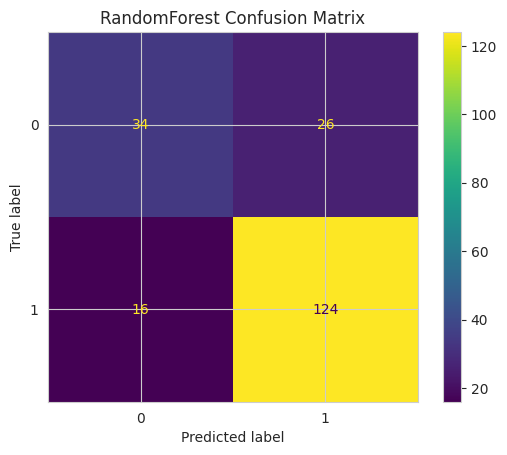


🔥 LogisticRegression Results:
Best Parameters: {'classifier__solver': 'saga', 'classifier__penalty': 'l2', 'classifier__max_iter': 1000, 'classifier__C': 0.1}
Accuracy: 0.7200
F1 Score: 0.7879
ROC AUC: 0.7555
PR AUC: 0.8715
KS Statistic: 0.4286
Precision: 0.8387
Recall: 0.7429
Log Loss: 0.5708
MCC: 0.3866
Number of features selected: 53
Selected features: ['duration', 'credit_amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'credit_per_month', 'age_to_credit_ratio', 'debt_burden', 'credit_to_duration_ratio']...
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  40                  20
Actual Positive                  36                 104


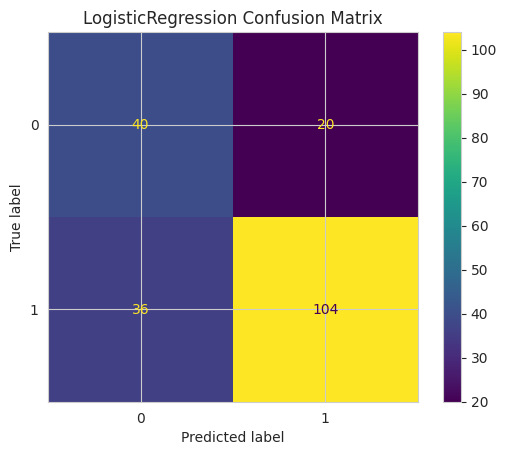


🔥 GradientBoosting Results:
Best Parameters: {'classifier__subsample': 0.9, 'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.05}
Accuracy: 0.7650
F1 Score: 0.8351
ROC AUC: 0.7719
PR AUC: 0.8617
KS Statistic: 0.4833
Precision: 0.8207
Recall: 0.8500
Log Loss: 0.5128
MCC: 0.4276
Number of features selected: 53
Selected features: ['duration', 'credit_amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'credit_per_month', 'age_to_credit_ratio', 'debt_burden', 'credit_to_duration_ratio']...
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  34                  26
Actual Positive                  21                 119


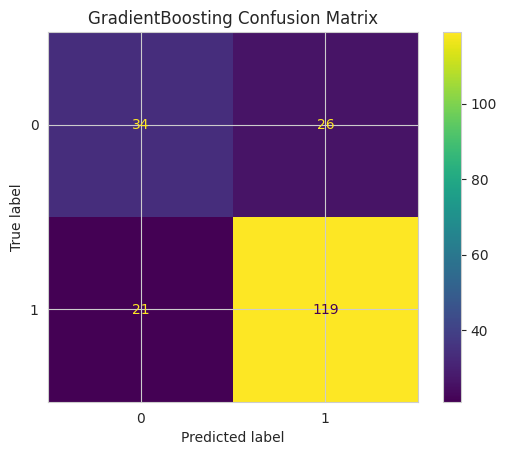


🔥 XGBoost Results:
Best Parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Accuracy: 0.7750
F1 Score: 0.8464
ROC AUC: 0.7652
PR AUC: 0.8555
KS Statistic: 0.4881
Precision: 0.8105
Recall: 0.8857
Log Loss: 0.5523
MCC: 0.4349
Number of features selected: 53
Selected features: ['duration', 'credit_amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'credit_per_month', 'age_to_credit_ratio', 'debt_burden', 'credit_to_duration_ratio']...
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  31                  29
Actual Positive                  16                 124


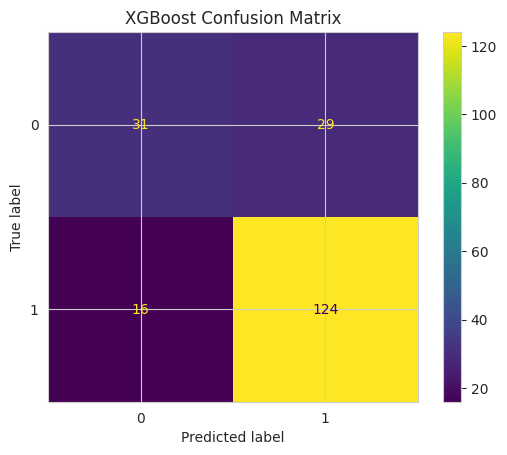

[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3474
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

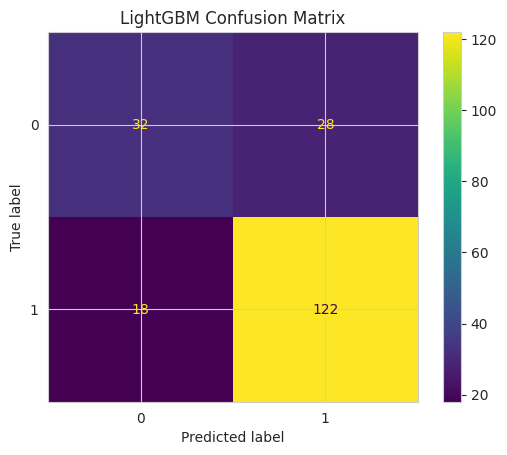

In [43]:
# --------------------------------------------------
# STEP 4: Train and Evaluate Models
# --------------------------------------------------
model_metrics = {}

# Function to calculate KS statistic
def ks_statistic(y_true, y_score):
    """
    Calculate Kolmogorov-Smirnov statistic for credit scoring.
    Works with pandas Series or numpy arrays.
    """
    # Convert to numpy arrays if they're not already
    if hasattr(y_true, 'values'):
        y_true = y_true.values
    if hasattr(y_score, 'values'):
        y_score = y_score.values

    # Create a DataFrame with scores and true values
    df = pd.DataFrame({'score': y_score, 'target': y_true})

    # Sort by score in descending order
    df = df.sort_values(by='score', ascending=False).reset_index(drop=True)

    # Calculate cumulative distributions
    n_pos = df['target'].sum()
    n_neg = len(df) - n_pos

    if n_pos == 0 or n_neg == 0:
        return 0.0  # Handle edge case

    # Calculate cumulative distributions (proportion of positive/negative up to each point)
    df['cum_pos'] = df['target'].cumsum() / n_pos
    df['cum_neg'] = (1 - df['target']).cumsum() / n_neg

    # KS is the maximum absolute difference between the distributions
    df['ks'] = (df['cum_pos'] - df['cum_neg']).abs()

    return df['ks'].max()


for name, config in models.items():
    # Use SelectFromModel instead of RFE
    pipeline = Pipeline([
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')),
        ('classifier', config['model'])
    ])

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=config['params'],
        n_iter=10,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train_resampled, y_train_resampled)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_transformed)
    y_proba = best_model.predict_proba(X_test_transformed)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    # Calculate KS statistic
    ks_stat = ks_statistic(y_test, y_proba)

    model_metrics[name] = {
        'best_params': search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'log_loss': log_loss(y_test, y_proba),
        'mcc': matthews_corrcoef(y_test, y_pred),
        'pr_auc': pr_auc,
        'ks_statistic': ks_stat,  # Added KS statistic
        'model': best_model,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Print metrics in a well-formatted way
    print(f"\n🔥 {name} Results:")
    print(f"Best Parameters: {search.best_params_}")
    print(f"Accuracy: {model_metrics[name]['accuracy']:.4f}")
    print(f"F1 Score: {model_metrics[name]['f1']:.4f}")
    print(f"ROC AUC: {model_metrics[name]['roc_auc']:.4f}")
    print(f"PR AUC: {model_metrics[name]['pr_auc']:.4f}")
    print(f"KS Statistic: {model_metrics[name]['ks_statistic']:.4f}")  # Added KS statistic
    print(f"Precision: {model_metrics[name]['precision']:.4f}")
    print(f"Recall: {model_metrics[name]['recall']:.4f}")
    print(f"Log Loss: {model_metrics[name]['log_loss']:.4f}")
    print(f"MCC: {model_metrics[name]['mcc']:.4f}")



    # NEW ADDITION: Print feature selection information
    feature_selector = best_model.named_steps['feature_selection']
    selected_features = [all_feature_names[i] for i, selected in enumerate(feature_selector.get_support()) if selected]
    print(f"Number of features selected: {len(selected_features)}")
    print(f"Selected features: {selected_features[:10]}...")  # Show first 10

    print("Confusion Matrix:")
    print(pd.DataFrame(model_metrics[name]['confusion_matrix'],
                      index=["Actual Negative", "Actual Positive"],
                      columns=["Predicted Negative", "Predicted Positive"]))

    # Plot confusion matrix
    ConfusionMatrixDisplay(model_metrics[name]['confusion_matrix']).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [54]:
# Create a simple scoring function that emphasizes PR AUC but considers other metrics
def credit_risk_score(metrics):
    # Weighted combination with emphasis on PR AUC and KS statistic
    return (
        0.5 * metrics['pr_auc'] +  # 50% weight on PR AUC
        0.3 * metrics['ks_statistic'] +  # 30% weight on KS statistic
        0.2 * metrics['roc_auc']  # 20% weight on ROC AUC
    )

# Find best model using the combined score
best_model_name = max(model_metrics, key=lambda name: credit_risk_score(model_metrics[name]))
best_model = model_metrics[best_model_name]['model']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"Precision-Recall AUC: {model_metrics[best_model_name]['pr_auc']:.4f}")
print(f"KS Statistic: {model_metrics[best_model_name]['ks_statistic']:.4f}")
print(f"ROC AUC: {model_metrics[best_model_name]['roc_auc']:.4f}")  # Add this line

# Save selected features from the best model
feature_selector = best_model.named_steps['feature_selection']
selected_features = [all_feature_names[i] for i, selected in enumerate(feature_selector.get_support()) if selected]
print(f"Number of features selected by best model: {len(selected_features)}")
joblib.dump(selected_features, '/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/selected_features.pkl')

# Create and save a complete pipeline
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('best_model', best_model)
])

joblib.dump(final_pipeline, '/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/credit_risk_assessment_model.pkl')


🏆 Best Model: RandomForest
Precision-Recall AUC: 0.8732
KS Statistic: 0.5190
ROC AUC: 0.7843
Number of features selected by best model: 53


['/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/credit_risk_assessment_model.pkl']

In [58]:
from hsml.schema import Schema
from hsml.model import Model
import joblib
import os
import pandas as pd

# Create a schema from your test data
schema = Schema(X_test)

# Connect to Hopsworks
project = hopsworks.login()  # This already returns a Project object
mr = project.get_model_registry()

# Path to your model file
model_path = '/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/credit_risk_assessment_model.pkl'

# Load the model
model_pipeline = joblib.load(model_path)
print(f"✅ Loaded model from {model_path}")

# Use your actual metrics from the model training
roc_auc = 0.7843
pr_auc = 0.8732
ks_stat = 0.5190

# Calculate weighted credit score
credit_score = 0.5 * pr_auc + 0.3 * ks_stat + 0.2 * roc_auc
print(f"Credit Risk Score: {credit_score:.4f}")

# Create a directory for model files (Hopsworks requires a directory)
model_dir = "credit_risk_model_dir"
os.makedirs(model_dir, exist_ok=True)
model_file = os.path.join(model_dir, "model.pkl")
joblib.dump(model_pipeline, model_file)

# Create model metadata object
hopsworks_model = mr.python.create_model(
    name="credit_risk_assessment_model",
    metrics={
        "credit_risk_score": round(credit_score, 4),
        "pr_auc": round(pr_auc, 4),
        "ks_statistic": round(ks_stat, 4),
        "roc_auc": round(roc_auc, 4)
    },
    description="Credit risk model optimized using weighted combination of PR AUC (50%), KS statistic (30%), and ROC AUC (20%)",
    input_example=X_test.iloc[0:1],
    model_schema=schema
)

# Save the model directory to registry
hopsworks_model.save(model_dir)
print(f"✅ Model saved to Hopsworks Model Registry")

Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1218709
✅ Loaded model from /content/drive/MyDrive/Colab Notebooks/credit_risk_classification/credit/credit_risk_assessment_model.pkl
Credit Risk Score: 0.7492


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/9466893 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/310 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/2855 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1218709/models/credit_risk_assessment_model/1
✅ Model saved to Hopsworks Model Registry


In [ ]:
# --------------------------------------------------
# STEP 2: Create Preprocessing Pipeline
# --------------------------------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_features)
])

# Apply preprocessing before SMOTE
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Handle class imbalance with SMOTE after preprocessing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [ ]:
# --------------------------------------------------
# STEP 3: Define Models & Hyperparameter Search Spaces
# --------------------------------------------------
models = {
    "RandomForest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__max_depth': [3, 5, None],
            'classifier__min_samples_split': [2, 5],
            'classifier__max_features': ['sqrt', 'log2']
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(class_weight='balanced', random_state=42),
        "params": {
            'classifier__C': np.logspace(-3, 3, 7),
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga'],
            'classifier__max_iter': [1000, 2000]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.05, 0.1],
            'classifier__max_depth': [3, 5, 7],
            'classifier__subsample': [0.8, 0.9, 1.0]
        }
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5],
        }
    },
    "LightGBM": {
        "model": lgb.LGBMClassifier(random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5],
        }
    }
}



🔥 RandomForest Results:
Best Parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_features': 'log2', 'classifier__max_depth': None}
Accuracy: 0.7700
F1 Score: 0.8414
ROC AUC: 0.7785
Precision: 0.8133
Recall: 0.8714
Log Loss: 0.5103
MCC: 0.4284
PR AUC: 0.8771
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  32                  28
Actual Positive                  18                 122


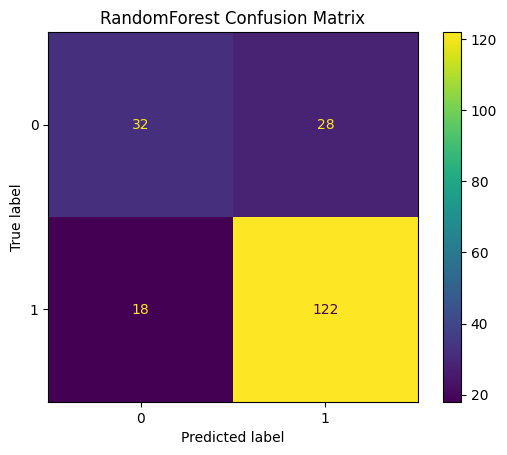


🔥 LogisticRegression Results:
Best Parameters: {'classifier__solver': 'saga', 'classifier__penalty': 'l2', 'classifier__max_iter': 1000, 'classifier__C': 0.1}
Accuracy: 0.7100
F1 Score: 0.7769
ROC AUC: 0.7720
Precision: 0.8417
Recall: 0.7214
Log Loss: 0.5618
MCC: 0.3786
PR AUC: 0.8821
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  41                  19
Actual Positive                  39                 101


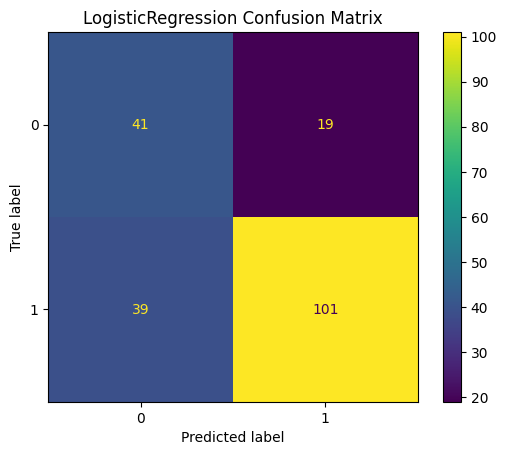


🔥 GradientBoosting Results:
Best Parameters: {'classifier__subsample': 0.9, 'classifier__n_estimators': 300, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Accuracy: 0.7700
F1 Score: 0.8392
ROC AUC: 0.7756
Precision: 0.8219
Recall: 0.8571
Log Loss: 0.7472
MCC: 0.4375
PR AUC: 0.8518
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  34                  26
Actual Positive                  20                 120


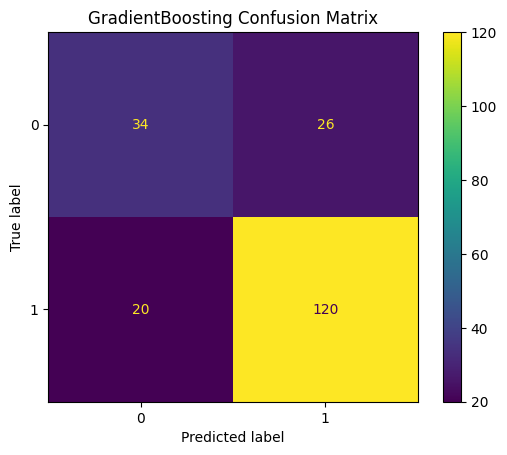


🔥 XGBoost Results:
Best Parameters: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Accuracy: 0.7450
F1 Score: 0.8259
ROC AUC: 0.7724
Precision: 0.7908
Recall: 0.8643
Log Loss: 0.5442
MCC: 0.3577
PR AUC: 0.8574
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  28                  32
Actual Positive                  19                 121


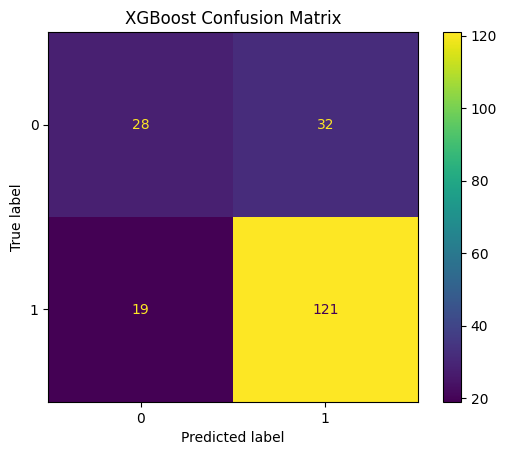

[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4143
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4132
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 560, number of negative: 560

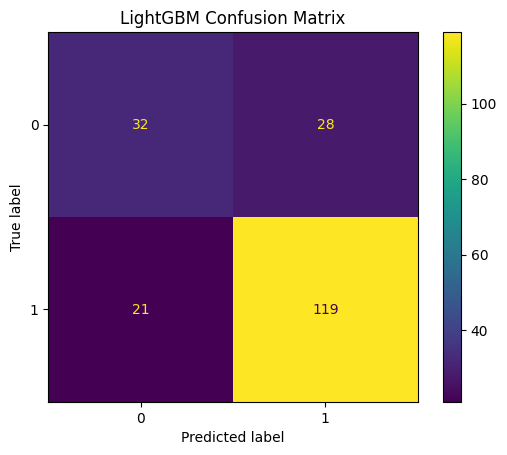

In [ ]:
# --------------------------------------------------
# STEP 4: Train & Optimize Models
# --------------------------------------------------
model_metrics = {}

for name, config in models.items():
    pipeline = Pipeline([
        ('feature_selection', RFE(config['model'], n_features_to_select=0.8)),
        ('classifier', config['model'])
    ])

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=config['params'],
        n_iter=10,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train_resampled, y_train_resampled)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_transformed)
    y_proba = best_model.predict_proba(X_test_transformed)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    model_metrics[name] = {
    'best_params': search.best_params_,
    'accuracy': accuracy_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, y_proba),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'log_loss': log_loss(y_test, y_proba),
    'mcc': matthews_corrcoef(y_test, y_pred),
    'pr_auc': pr_auc,
    'model': best_model,
    'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Print metrics in a well-formatted way
    print(f"\n🔥 {name} Results:")
    print(f"Best Parameters: {search.best_params_}")
    print(f"Accuracy: {model_metrics[name]['accuracy']:.4f}")
    print(f"F1 Score: {model_metrics[name]['f1']:.4f}")
    print(f"ROC AUC: {model_metrics[name]['roc_auc']:.4f}")
    print(f"Precision: {model_metrics[name]['precision']:.4f}")
    print(f"Recall: {model_metrics[name]['recall']:.4f}")
    print(f"Log Loss: {model_metrics[name]['log_loss']:.4f}")
    print(f"MCC: {model_metrics[name]['mcc']:.4f}")
    print(f"PR AUC: {model_metrics[name]['pr_auc']:.4f}")
    print("Confusion Matrix:")
    print(pd.DataFrame(model_metrics[name]['confusion_matrix'],
                      index=["Actual Negative", "Actual Positive"],
                      columns=["Predicted Negative", "Predicted Positive"]))

    # Plot confusion matrix
    ConfusionMatrixDisplay(model_metrics[name]['confusion_matrix']).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [ ]:
# --------------------------------------------------
# STEP 3: Define Models & Hyperparameter Search Spaces
# --------------------------------------------------
models = {
    "RandomForest": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200, 300, 400],
            'classifier__max_depth': [3, 5, 7, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__max_features': ['sqrt', 'log2']
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(class_weight='balanced', random_state=42),
        "params": {
            'classifier__C': np.logspace(-3, 3, 7),
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear', 'saga'],
            'classifier__max_iter': [1000, 2000]
        }
    },
    "LightGBM": {
        "model": lgb.LGBMClassifier(random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200, 300],
            'classifier__learning_rate': [0.01, 0.05, 0.1],
            'classifier__max_depth': [3, 5, 7]
        }
    }
}


In [ ]:
# --------------------------------------------------
# STEP 4: Train & Optimize Models
# --------------------------------------------------
trained_models = []

for name, config in models.items():
    pipeline = Pipeline([
        ('feature_selection', RFE(config['model'], n_features_to_select=0.8)),
        ('classifier', config['model'])
    ])

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=config['params'],
        n_iter=15,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train_resampled, y_train_resampled)

    best_model = search.best_estimator_
    trained_models.append((name, best_model))


[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4143
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4132
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4143
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4132
[LightGBM] [Info] Number of data points in the train set: 1120, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

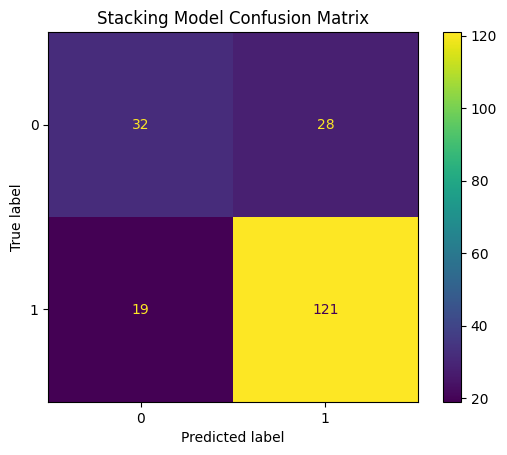

In [ ]:
# --------------------------------------------------
# STEP 5: Stacking Ensemble
# --------------------------------------------------
stacking_model = StackingClassifier(
    estimators=trained_models,
    final_estimator=LogisticRegression(max_iter=2000, random_state=42)
)

stacking_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = stacking_model.predict(X_test_transformed)
y_proba = stacking_model.predict_proba(X_test_transformed)[:, 1]

# Evaluate the Stacking Model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_proba)
mcc = matthews_corrcoef(y_test, y_pred)
precision_recall = precision_recall_curve(y_test, y_proba)
pr_auc = auc(precision_recall[1], precision_recall[0])
confusion = confusion_matrix(y_test, y_pred)

# Print Evaluation Metrics
print(f"\n🔥 Stacking Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")
print(f"MCC: {mcc:.4f}")
print("Confusion Matrix:")
print(pd.DataFrame(confusion, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted Positive"]))

# Display Confusion Matrix
ConfusionMatrixDisplay(confusion).plot()
plt.title("Stacking Model Confusion Matrix")
plt.show()


In [ ]:
# Save the stacking model
joblib.dump(stacking_model, '/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/new/stacked_credit_risk_model.pkl')

print(f"\n🏆 Best Model: Stacking Ensemble")
print("✅ Model saved successfully for deployment")


🏆 Best Model: Stacking Ensemble
✅ Model saved successfully for deployment


In [ ]:
from hsml.schema import Schema
from hsml.model import Model
import joblib

schema = Schema(X_test)

conn = hopsworks.login()
mr = project.get_model_registry()

model_path = f'/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/new/best_credit_risk_model.pkl'
# predictor_path = f'/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/new/predict.py'


# Load the model
model = joblib.load(model_path)
print(f"✅ Loaded model from {model_path}")



# Create model metadata object
model = mr.python.create_model(
    name="credit_risk_model",
    metrics={"roc_auc": round(roc_auc_score(y_test, y_proba), 4)},
    description="model for credit risk classification",
    input_example=X_test.iloc[0:1],
    model_schema=schema
)

# Save actual model directory to registry
model.save(model_path)

Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1218709
✅ Loaded model from /content/drive/MyDrive/Colab Notebooks/credit_risk_classification/new/best_credit_risk_model.pkl


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/9479986 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/310 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/2855 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1218709/models/credit_risk_model/1


Model(name: 'credit_risk_model', version: 1)

In [ ]:
# --------------------------------------------------
# STEP 5: Select & Save Best Model
# --------------------------------------------------
best_model_name = max(model_metrics, key=lambda k: model_metrics[k]['roc_auc'])
best_model = model_metrics[best_model_name]['model']

joblib.dump(best_model, '/content/drive/MyDrive/Colab Notebooks/credit_risk_classification/new/best_credit_risk_model.pkl')

print(f"\n🏆 Best Model: {best_model_name}")
print(f"ROC AUC: {model_metrics[best_model_name]['roc_auc']:.4f}")
print("✅ Model saved successfully for deployment")


🏆 Best Model: RandomForest
ROC AUC: 0.7785
✅ Model saved successfully for deployment
